In [1]:
# Preparation for programming
# Make sure to execute this cell first!
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from obspy import *
from obspy.core import read, UTCDateTime
from obspy.clients.fdsn import Client
import matplotlib.pylab as plt
import os
from os import path
from datetime import datetime 
from sumatra_loop import sumatra_loop
import numpy as np
from plot_event_station import plot_event_station

# 
# Applied Seismology, GEOS 626, University of Alaska Fairbanks
# Python coding by Nealey Sims
# Template script for analyzing modes spectra for sumatra
#
# Downloads all BH* and LH* data needed for the Sumatra B assignment
# Calls homebrew function sumatra_loop.py

# Plotting parameter
plt.rcParams['figure.figsize'] = 10, 5
plt.rcParams['lines.linewidth'] = 1

In [2]:
# Setting up parameters for getting waveforms
client = Client("IRIS")
t = UTCDateTime("2004-12-26T00:58:53.0")   # origin time of Sumatra earthquake
LHstarttime = t-(0.5*24*60*60)                 # 0.5 days before the the origin time
LHendtime = t+(10*24*60*60)                   # 10 days after the the origin time
BHstarttime = t-(1*60*60)                     # 1 hour before origin time
BHendtime = t+(4*60*60)                       # 4 hours after orgin time
elat = 3.09
elon = 94.26

# paths to waveform directory (if directory doesn't exist, it will create one)
LHdirectory = "./datawf/sumatraLH"
if not path.exists(LHdirectory):
        os.makedirs(LHdirectory)
BHdirectory = "./datawf/sumatraBH"
if not path.exists(BHdirectory):
        os.makedirs(BHdirectory)

# check to see if either waveform directory is empty        
LHdrec=os.listdir(LHdirectory)
BHdrec=os.listdir(BHdirectory)
if len(LHdrec) < 3 or len(BHdrec) < 3:
    print("Waveform directory empty. Downloading from IRIS")
    Dload = True
else:
    print("Waveform directory exists and is not empty")
    Dload = False

Waveform directory exists and is not empty


In [3]:
# get the inventory of stations
start = datetime.now()     # record the time it takes to download
stanames=[]
ntwk=[]
chans=[]
locs=[]
stimes=[]
etimes=[]
inventory = client.get_stations(network="G,II,IU",starttime=LHstarttime, endtime =LHendtime,  
                    channel="BHZ,LHZ", level="response")
#inventory.write("sumatra_inv.txt",format="STATIONTXT")

if Dload==True:
    for net in inventory:     
        for sta in net:
            # use inventory to save station locations
            for cha in sta:
                stanames.append(sta.code)
                ntwk.append(net.code)
                chans.append(cha.code) 
                locs.append(cha.location_code)
                if str(cha.code[0]) == "B":
                    stimes.append(BHstarttime)
                    etimes.append(BHendtime)
                else:
                    stimes.append(LHstarttime)
                    etimes.append(LHendtime)
            
    # download and save the raw waveform in a new directory
    for i in range (len(stanames)):
        st=[]
        try:
            st = client.get_waveforms(ntwk[i], stanames[i], locs[i], chans[i],
                                  stimes[i], etimes[i], attach_response=True)     # get the waveform
        except:
            print("no data for request",stanames[i],ntwk[i],chans[i])
            pass
        if len(st) != 0:
            if chans[i][0]=="L":
                try:
                    st.resample(1.0)                              # resample the sampling rate
                    st.merge(method=1, fill_value=0)              # merge the traces
                except:
                    print("couldn't merge traces")
                    pass
                # write and save the stream into SAC format
                st.write(path.join(LHdirectory, str(stanames[i])+str(locs[i])+str(chans[i])), format = 'SAC')
                
            else:
                try:
                    #st[0].stats.sampling_rate=round(tr.stats.sampling_rate)    # round the sampling rate
                    st.merge(method=1, fill_value=0)                           # merge the traces
                except:
                    print("couldn't merge traces")
                    pass
                st.write(path.join(BHdirectory, str(stanames[i])+str(locs[i])+str(chans[i])), format = 'SAC')
            print (st[0].stats)
# print download time
d = datetime.now() - start
print ("data download or data reading time: ", d, " s")

data download time:  0:00:05.895228  s


In [4]:
# path of the fft directory (if directory doesn't exist, it will create one)
directoryfft = "./datawf/sumatra_fft"
if not path.exists(directoryfft):
    os.makedirs(directoryfft) 
drec = os.listdir(directoryfft) 
#LHZst = read(LHdirectory+"/*Z",header=None)
# Checking to see if fft has been calculated and saved 
if len(drec) < 3: 
    print("Empty directory, running sumatra_loop to save fft")
    w=sumatra_loop(LHZst, directoryfft, True)
else:
    print("sumatra_directory exists and is not empty")
    #w=sumatra_loop(LHZst, directoryfft, False)   # Uncomment to see how stations cut without re-computing fft

sumatra_directory exists and is not empty


32/165 bad records that will not be used:
2/165 ADK00_LHZ_IU
4/165 AFI10_LHZ_IU
27/165 COCO00_LHZ_II
33/165 DAV00_LHZ_IU
34/165 DGAR00_LHZ_II
43/165 FUNA00_LHZ_IU
44/165 FUNA10_LHZ_IU
48/165 GRFO_LHZ_IU
55/165 HOPE00_LHZ_II
64/165 KEV00_LHZ_IU
65/165 KEV10_LHZ_IU
75/165 LCO_LHZ_IU
85/165 MBWA00_LHZ_IU
93/165 OTAV00_LHZ_IU
94/165 OTAV10_LHZ_IU
97/165 PALK00_LHZ_II
100/165 PEL_LHZ_G
104/165 PMG00_LHZ_IU
105/165 PMG10_LHZ_IU
107/165 POHA00_LHZ_IU
110/165 PTCN00_LHZ_IU
115/165 RAO00_LHZ_IU
125/165 RSSD00_LHZ_IU
126/165 SAML00_LHZ_IU
127/165 SAML10_LHZ_IU
130/165 SDV00_LHZ_IU
131/165 SDV10_LHZ_IU
133/165 SHEL00_LHZ_II
148/165 TRIS00_LHZ_IU
149/165 TRIS10_LHZ_IU
155/165 WAKE00_LHZ_IU
162/165 XMAS00_LHZ_IU


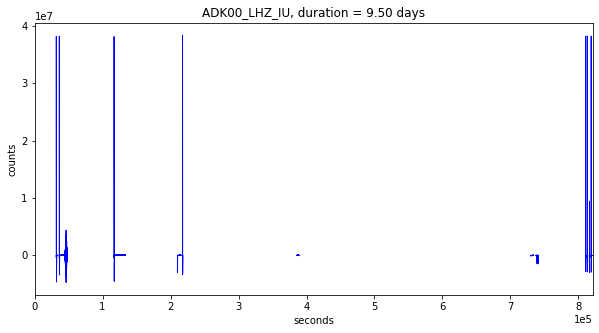

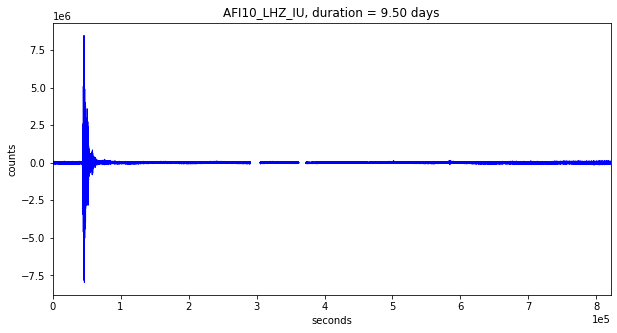

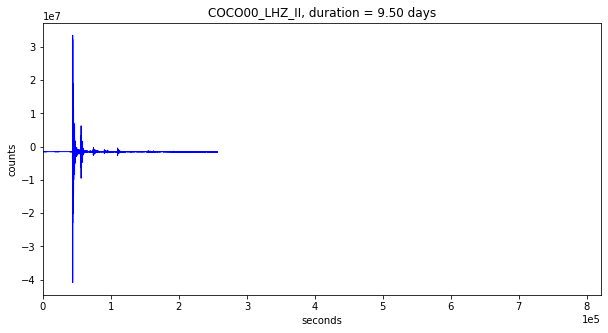

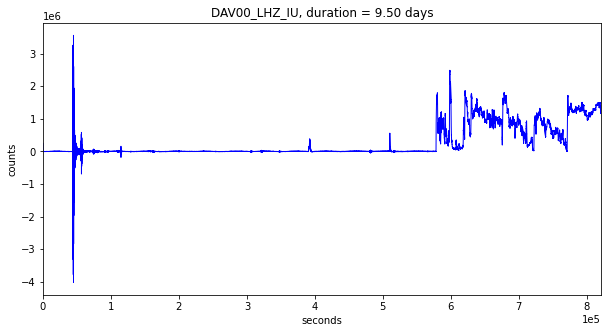

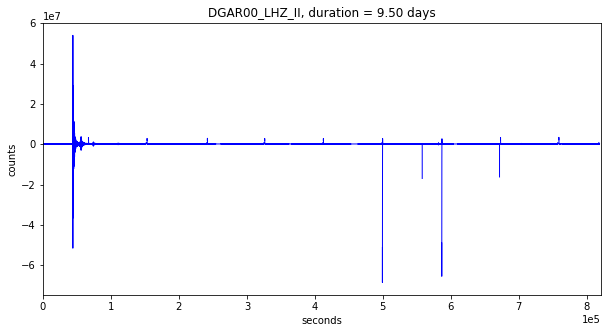

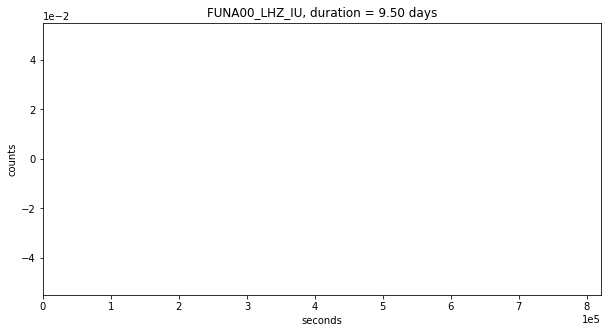

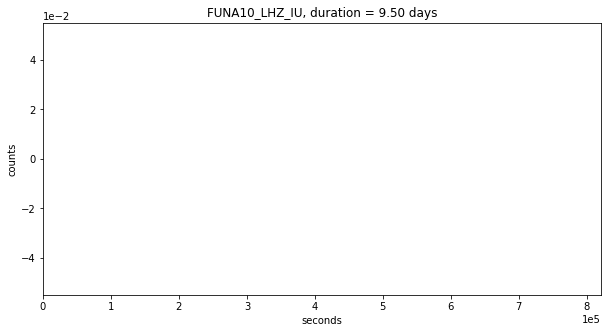

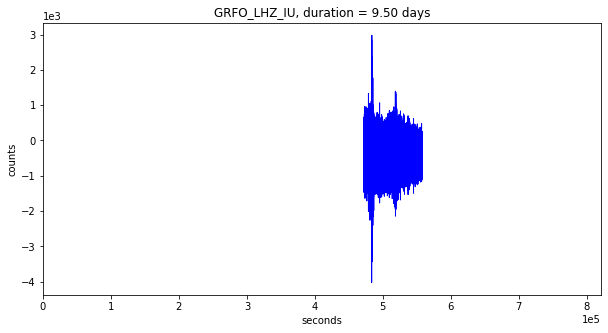

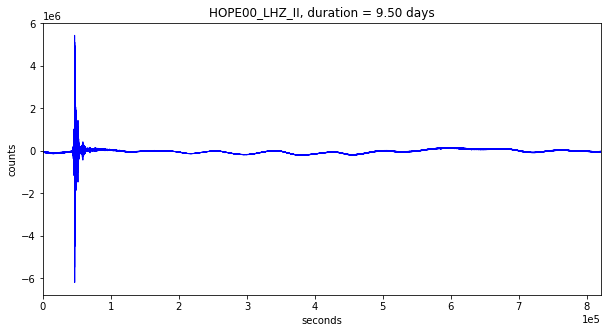

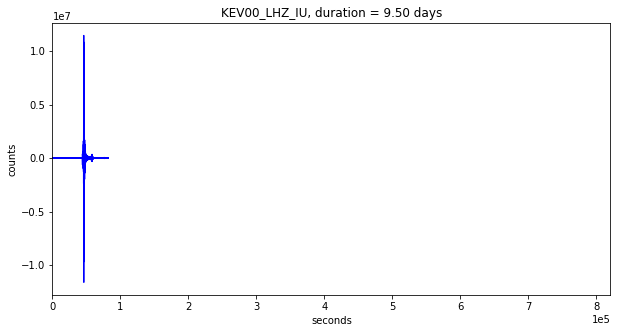

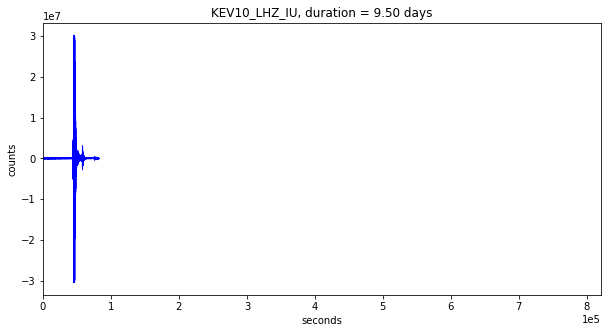

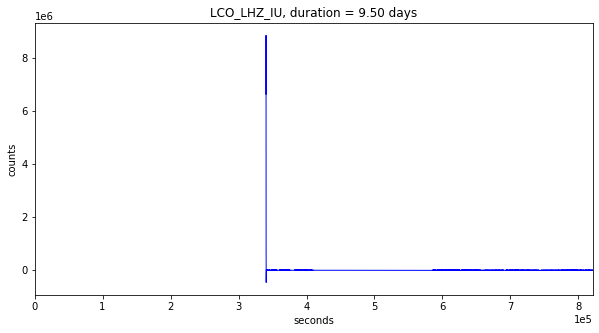

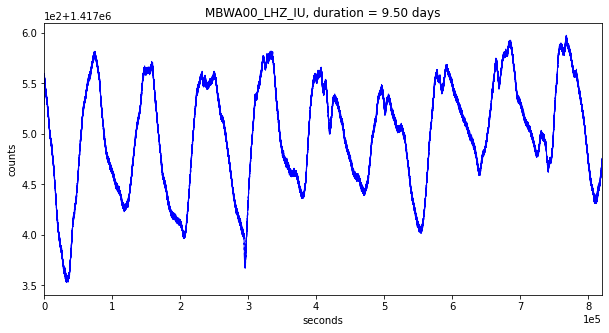

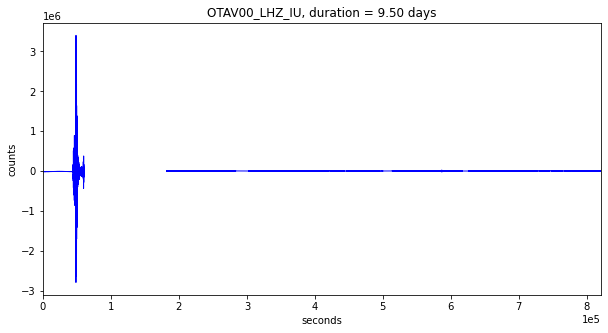

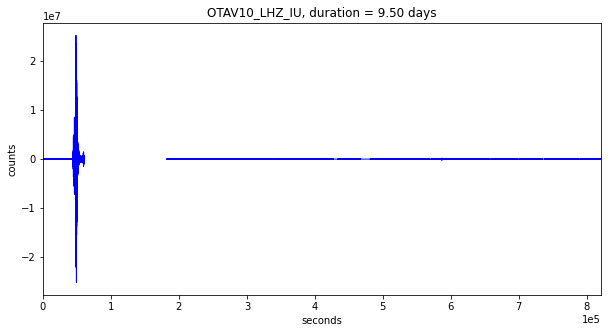

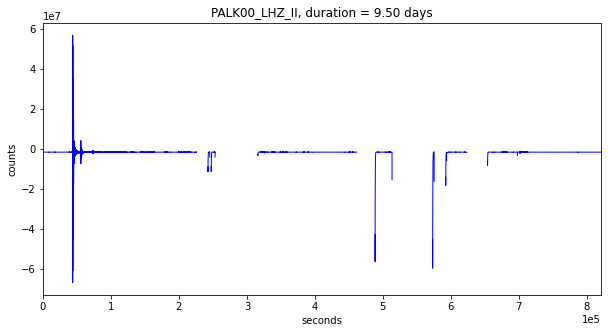

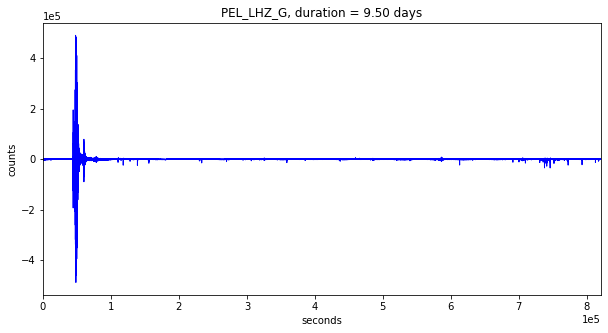

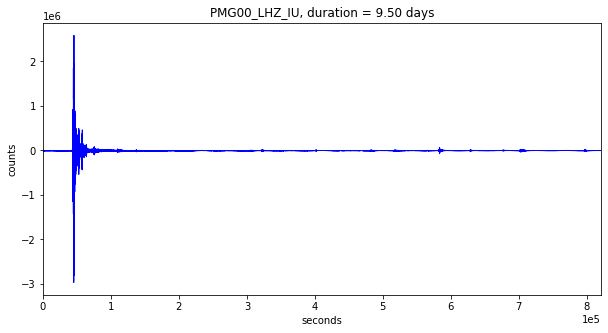

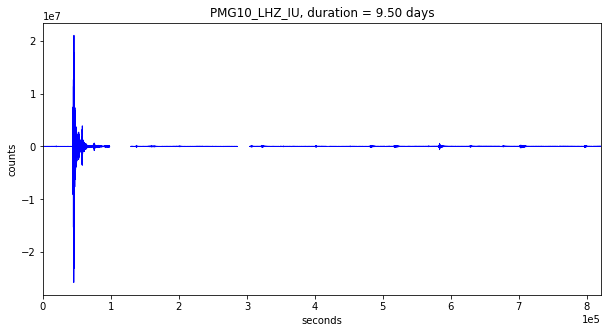

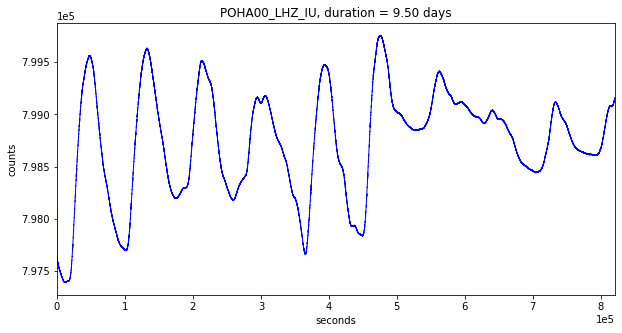

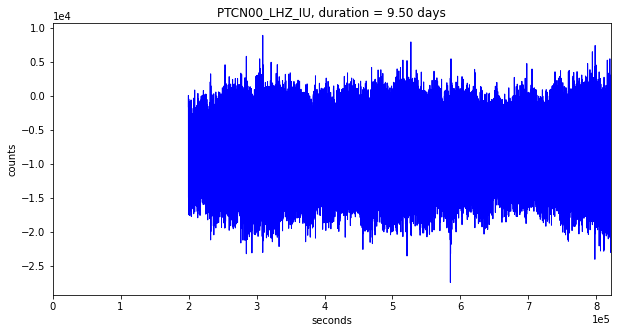

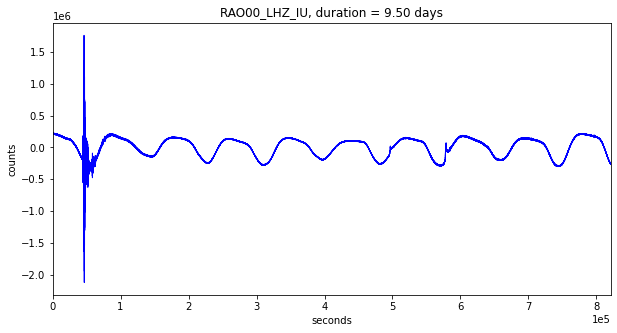

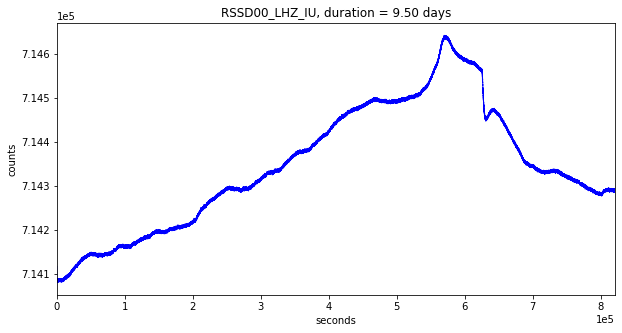

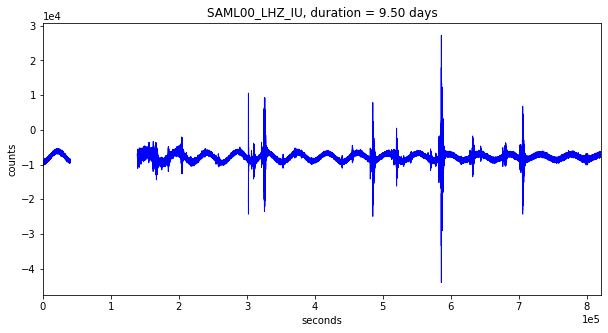

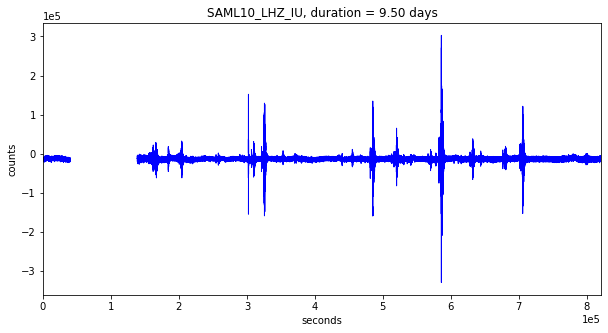

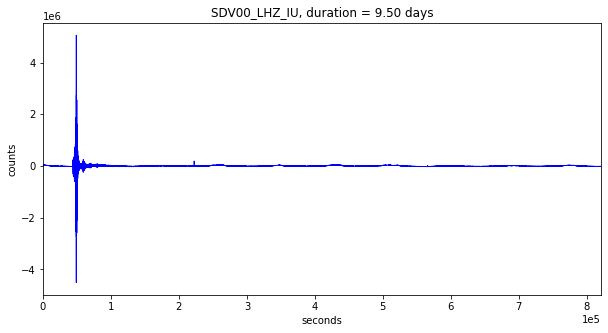

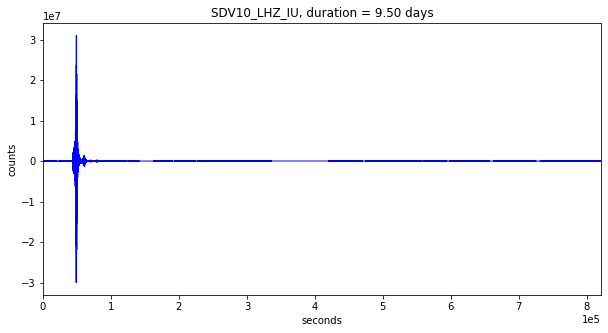

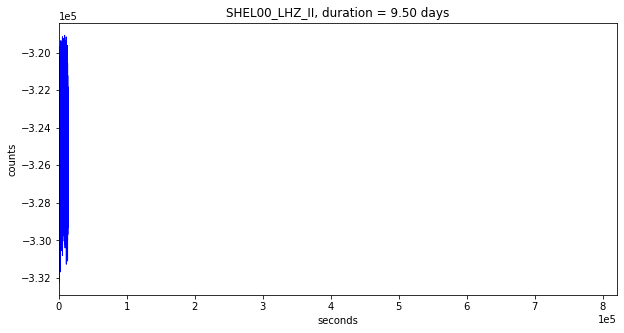

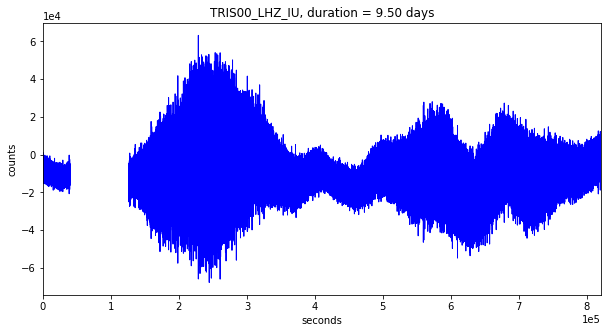

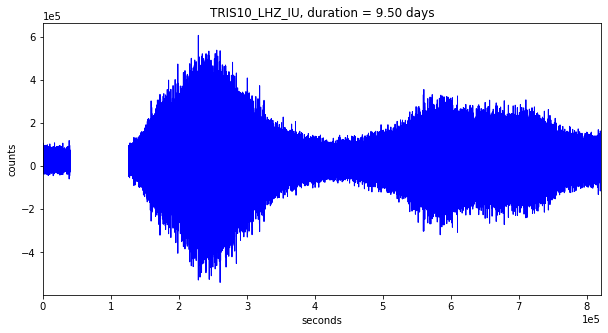

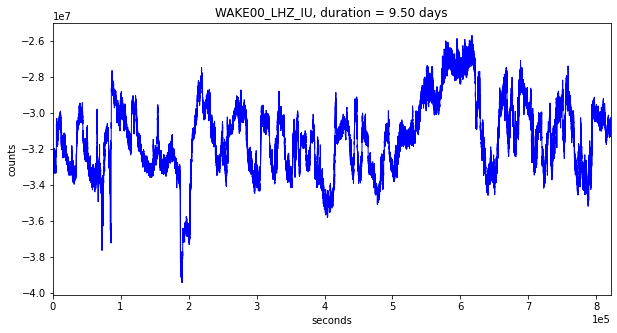

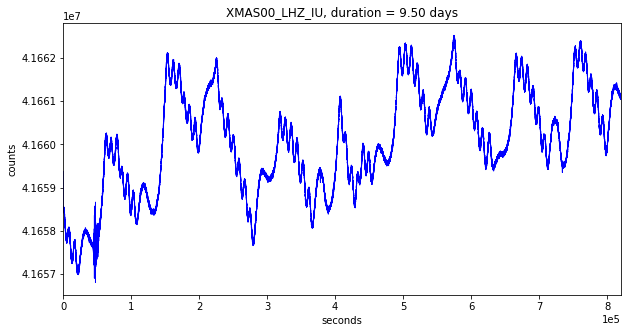

In [5]:
all_amps = read(directoryfft+"/*amps", header = None)
all_f = np.load(directoryfft+'/all_fft_freq.npy',allow_pickle=True)
all_phs = np.load(directoryfft+'/all_fft_phase.npy',allow_pickle=True)
ind,ind_pdf,stas,chans,nets,tag,ikeep = np.genfromtxt(str(directoryfft)+'/sumatra_modes.txt', unpack=True, dtype=str)
w=read(LHdirectory+"/*Z",header=None); wkp=Stream()
stanames=[];ksta=[];scut=[];slat=[];slon=[]

for k in range(len(stas)):
    if int(ikeep[k])==1:
        ksta.append(stas[k])
        wkp.append(w[k])
    else:
        scut.append(k)
for net in inventory:     
    for sta in net:
        for cha in sta:
            if str(sta.code)+str(cha.location_code) not in stanames:
                # Use inventory to save station locations for global map
                try:
                    ws=wkp.select(station=sta.code, location=cha.location_code)
                    slat.append(sta.latitude)
                    slon.append(sta.longitude)
                    stanames.append(str(sta.code)+str(cha.location_code))
                except:
                    pass
print('%i/%i bad records that will not be used:' %(len(scut),len(ind)))

# plot the seismograms that were manually cut from the analysis
for ii in range(len(ind)):   # loop over all time series
    if ii in scut:  
        sotime=UTCDateTime("2004-12-26T00:58:53.0")      # origin time of Sumatra earthquake
        w[ii].trim(sotime-(0.5*86400),sotime+(9*86400), pad=True, fill_value=0)
        stag = str(stas[ii])+ '_'+ str(chans[ii])+ '_'+ str(nets[ii])
        stdur = ('duration = %.2f days' % (len(w[ii])/86400))
        stit = str(stag) +', ' +str(stdur)
        w[ii].data = np.where(w[ii].data ==0.0000, np.nan, w[ii].data)
        print('%i/%i %s'%(ii,len(ind),stag))
        fig=plt.figure()
        plt.plot(w[ii].data, 'b')
        plt.xlabel('seconds');plt.ylabel('counts')
        plt.xlim(0,9.5*86400)
        plt.ticklabel_format(axis="both", style="sci", scilimits=(0,0))
        plt.title(stit)
      

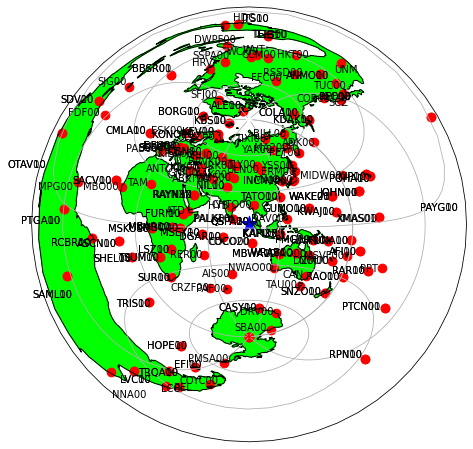

In [6]:
# global map of all available stations
plot_event_station(elat,elon,slat=slat,slon=slon,stas=stanames)

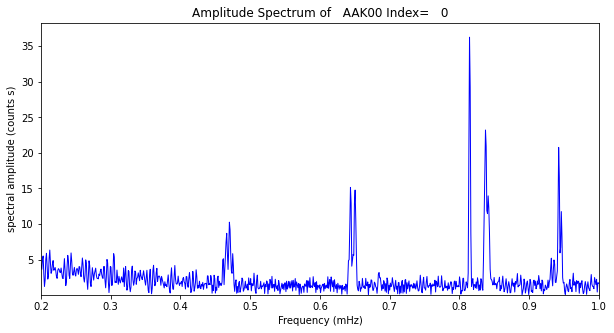

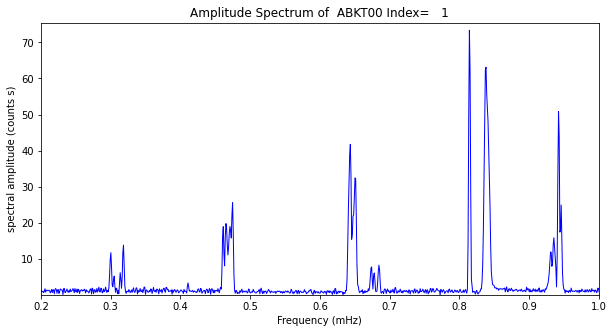

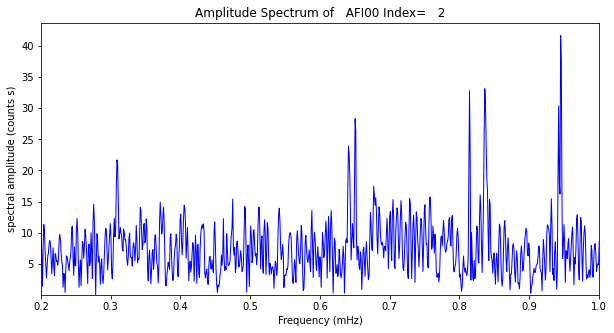

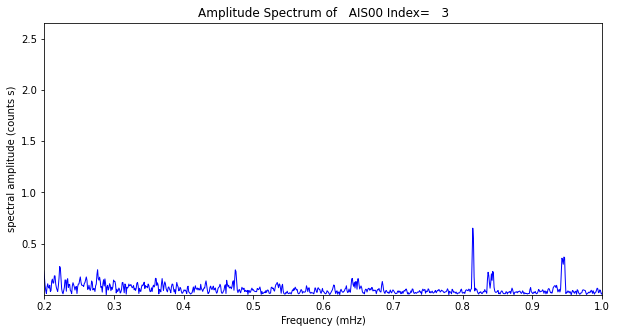

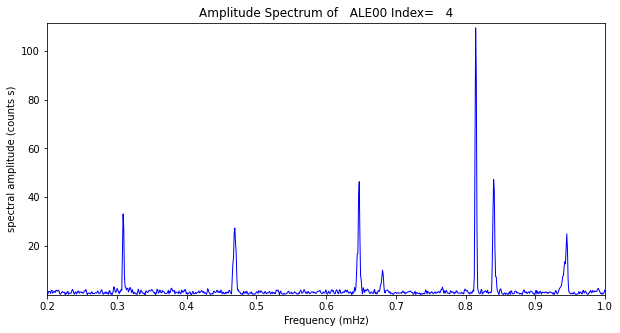

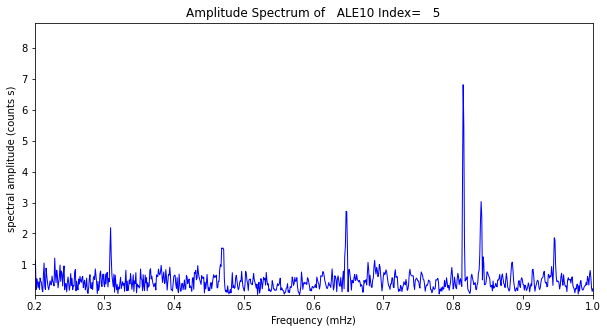

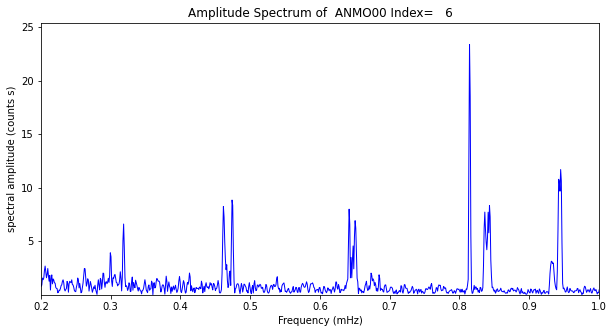

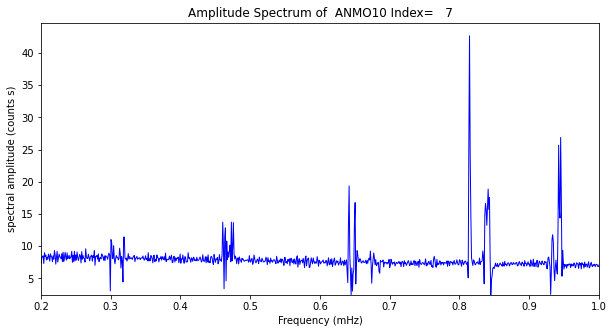

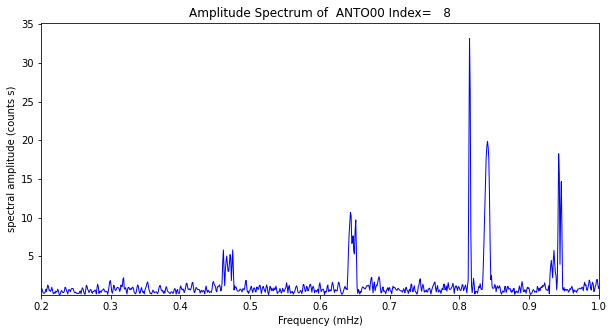

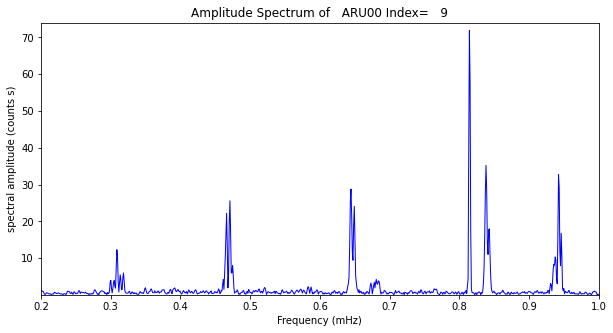

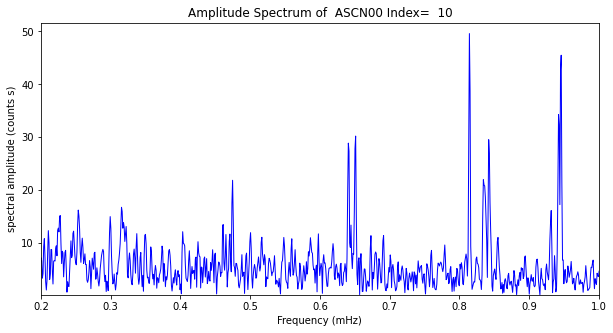

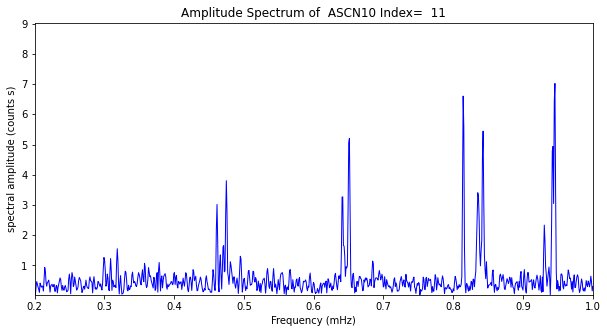

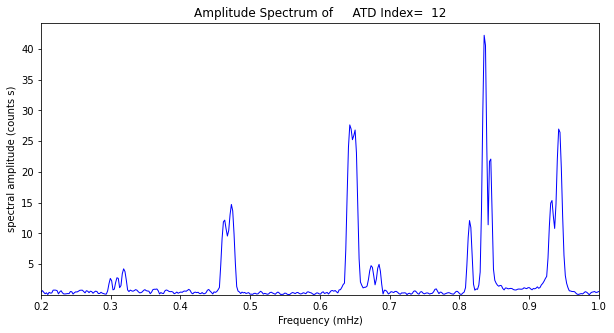

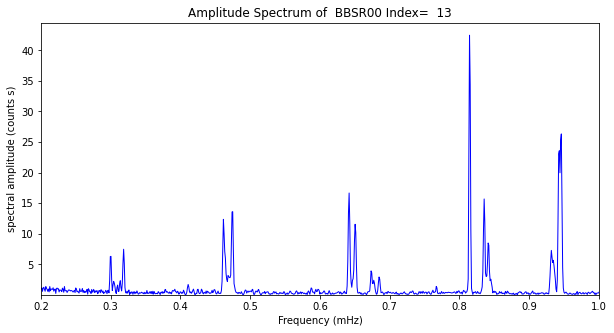

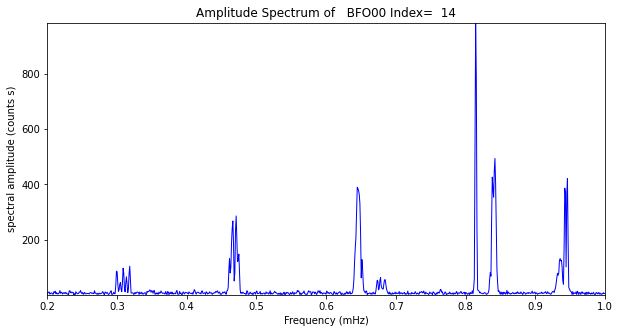

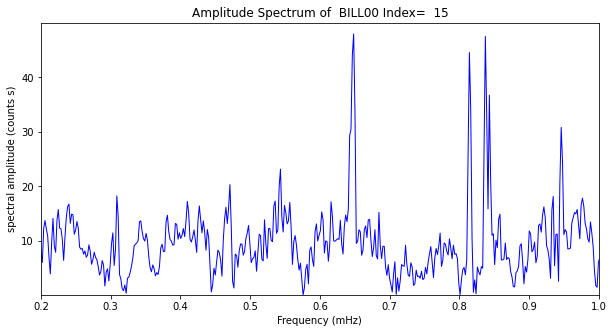

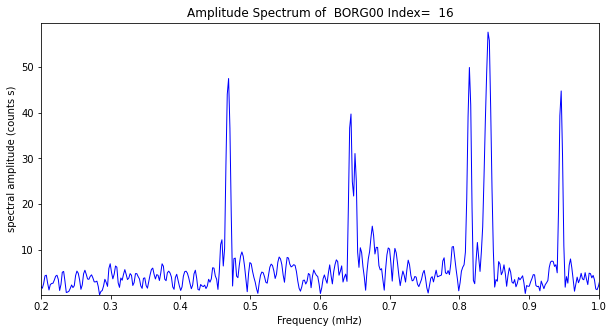

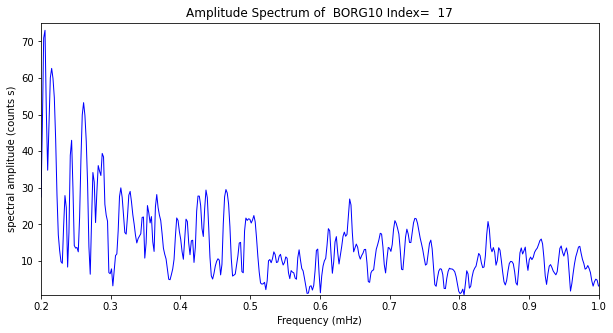

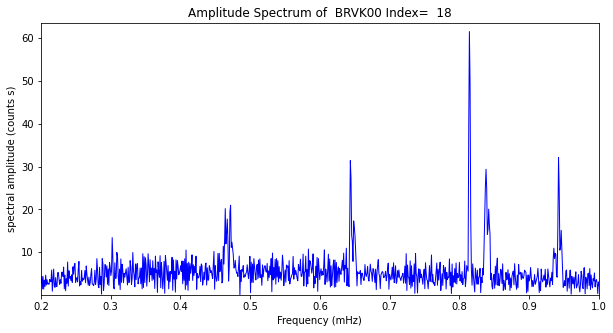

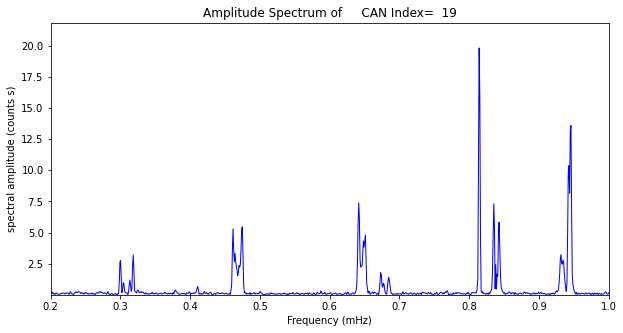

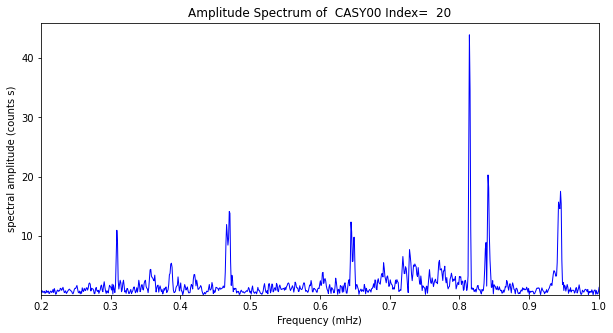

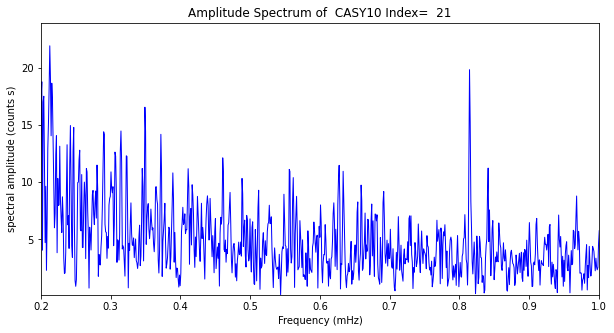

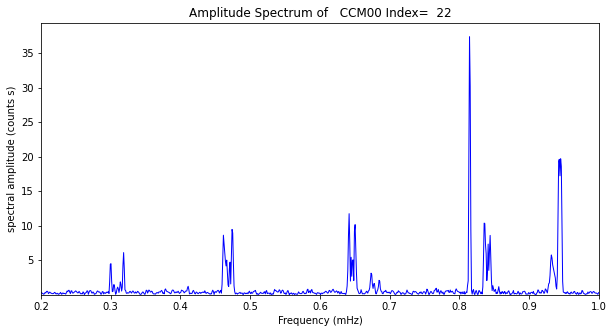

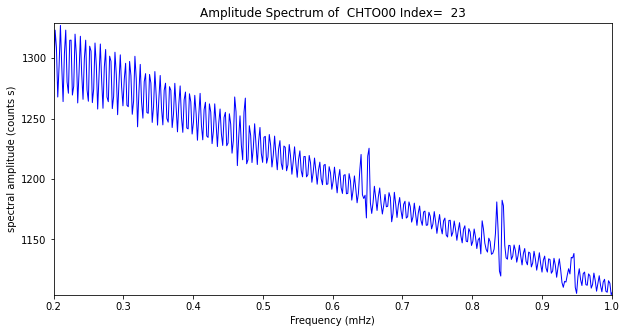

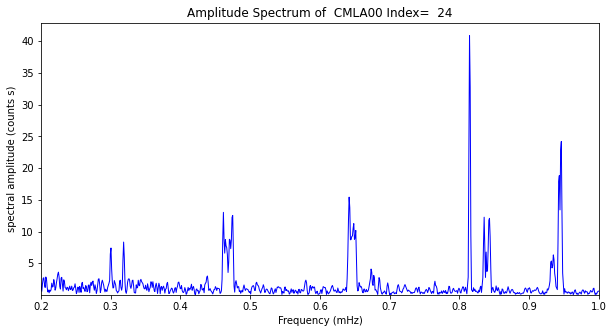

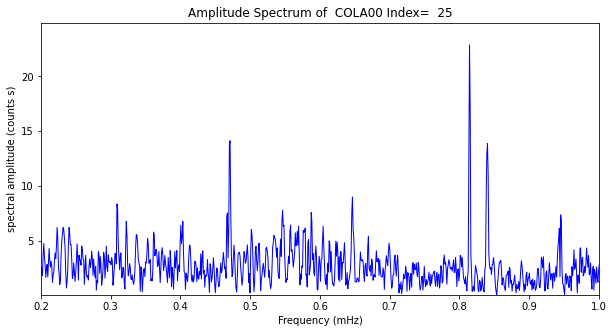

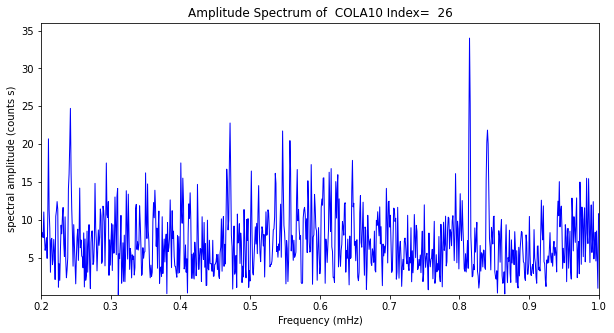

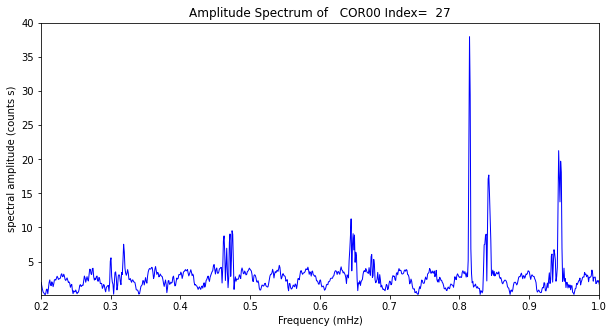

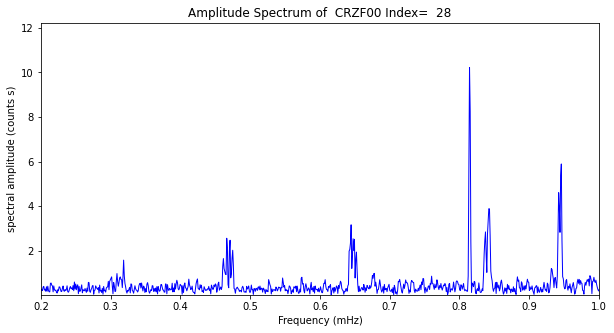

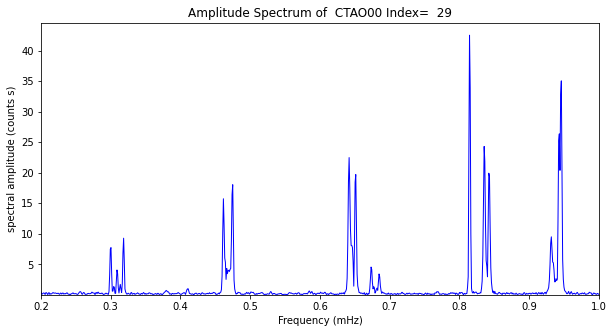

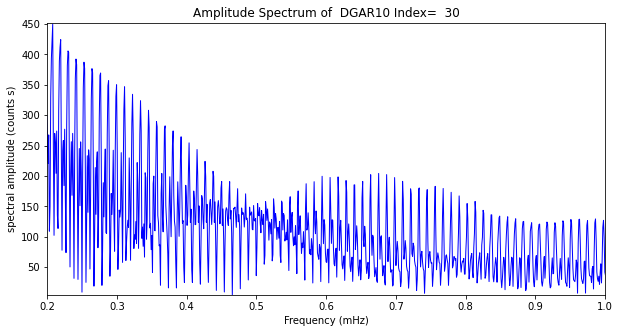

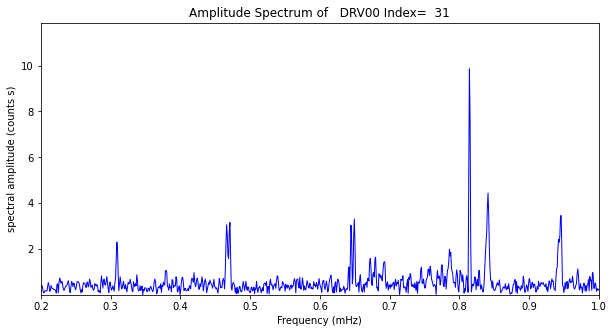

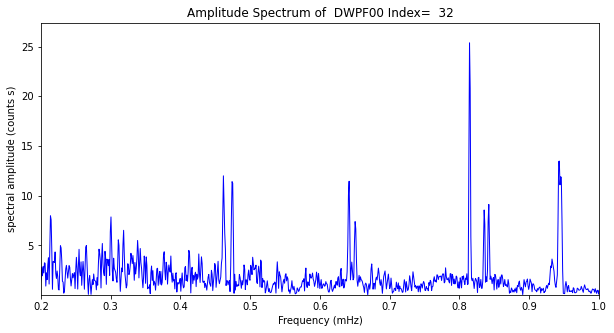

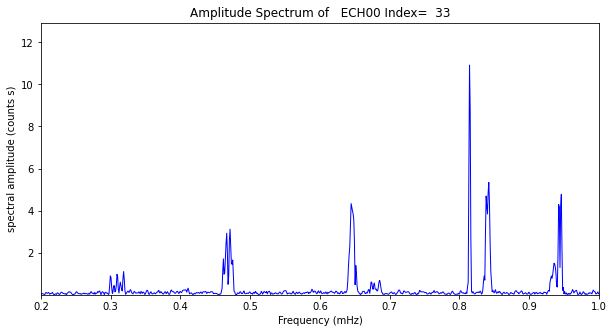

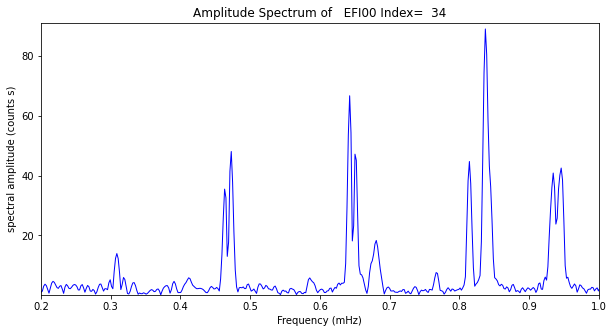

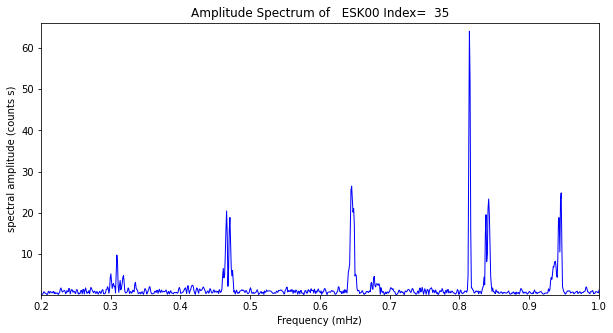

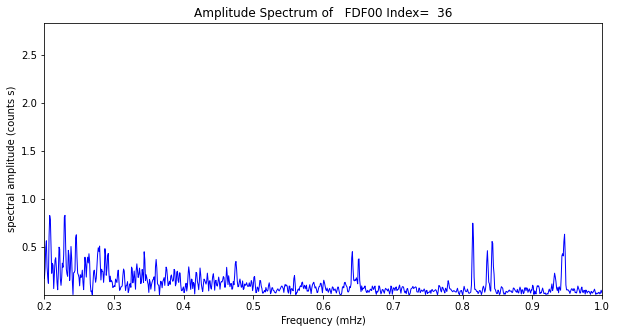

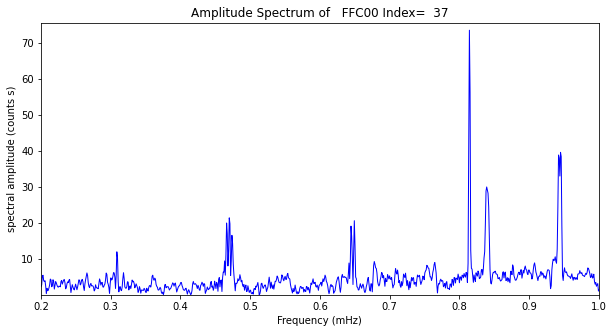

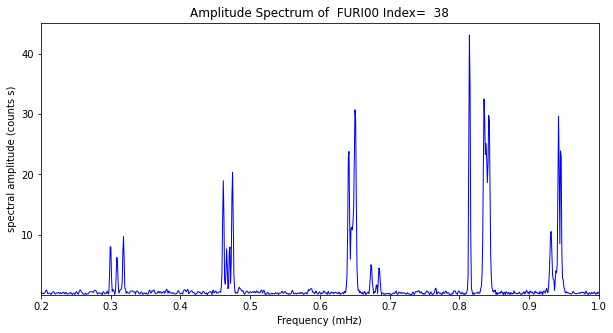

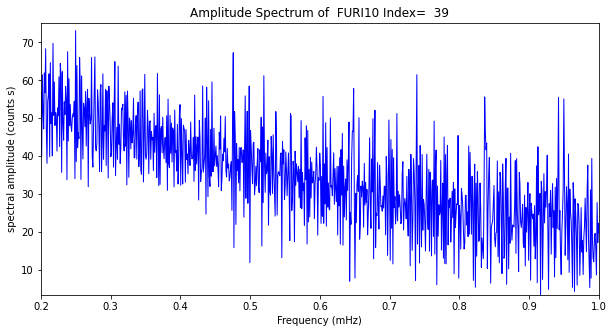

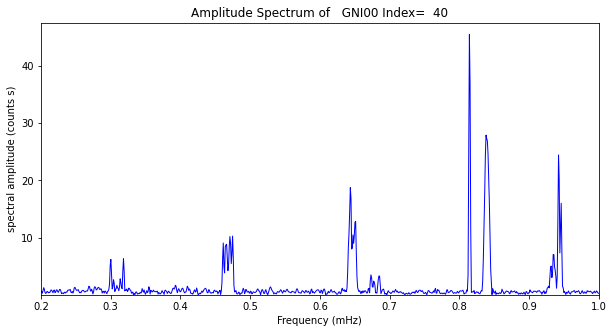

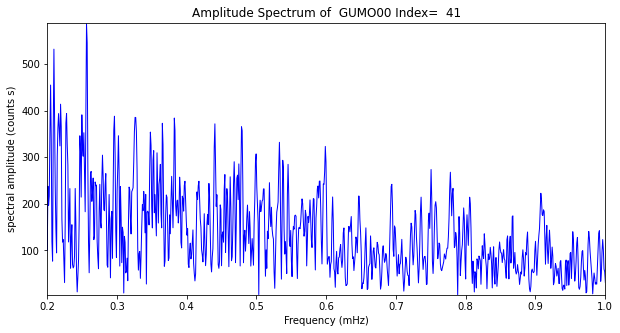

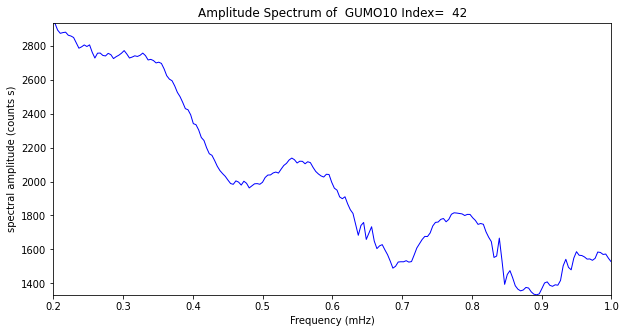

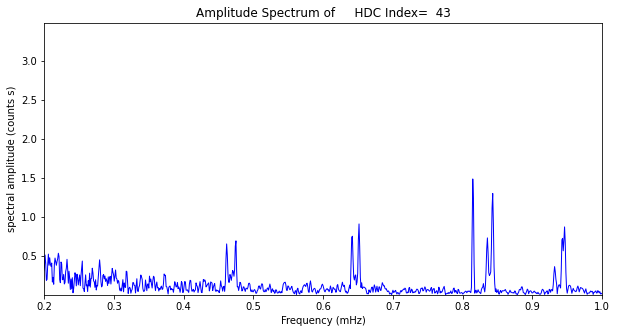

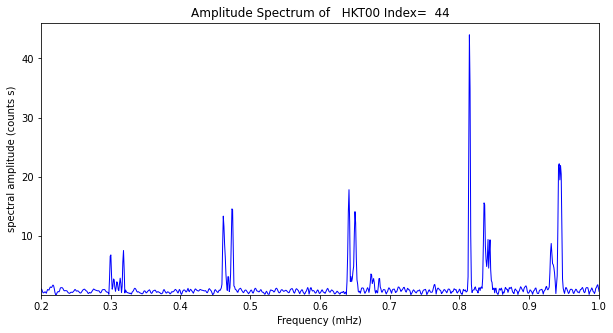

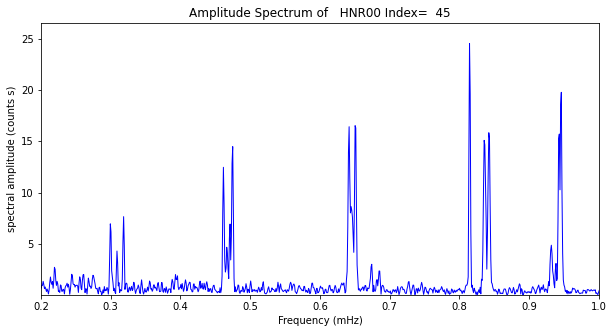

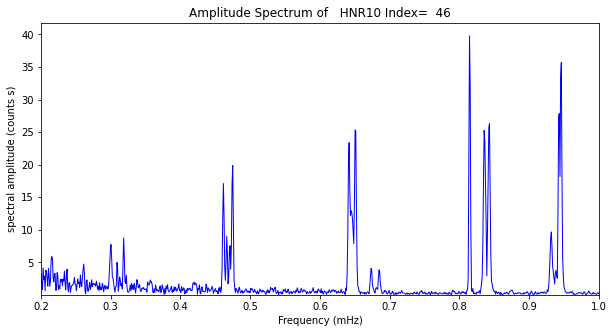

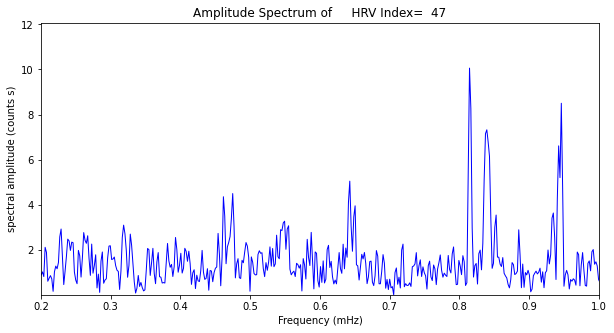

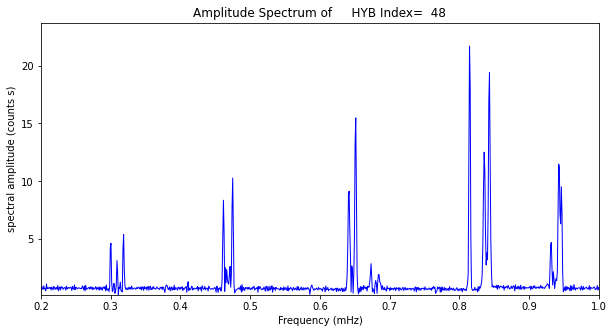

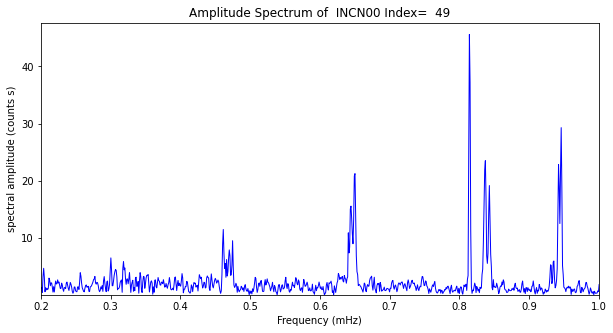

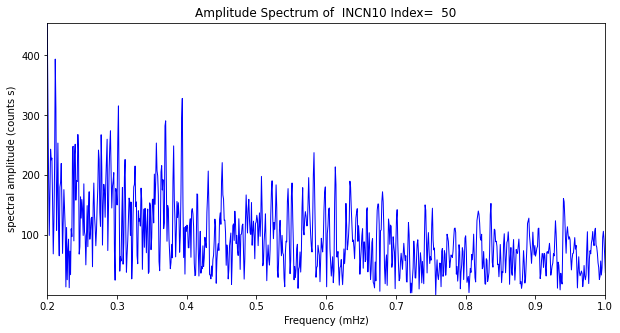

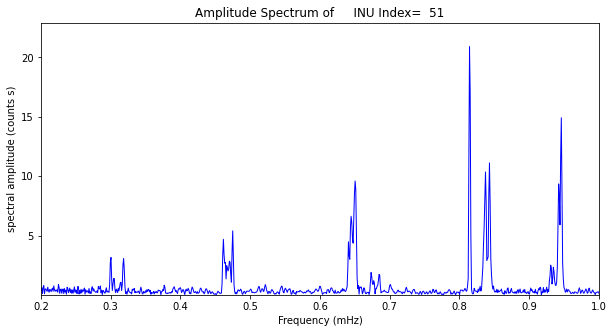

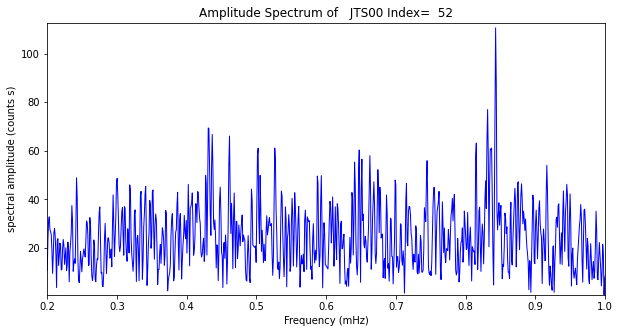

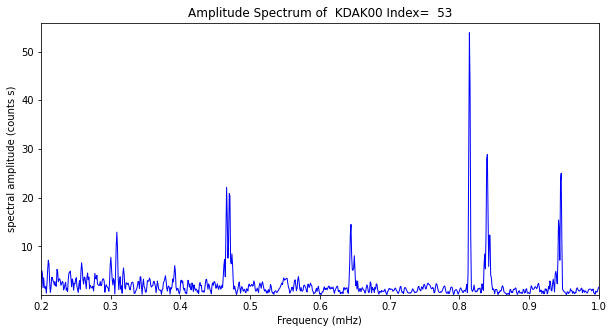

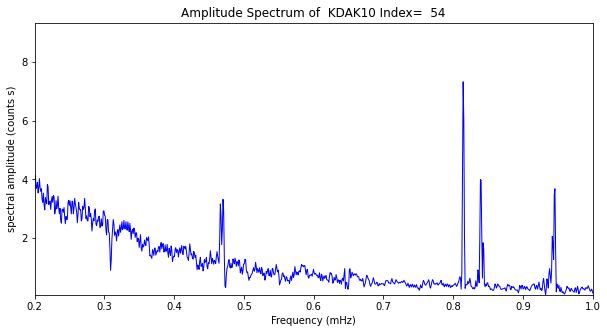

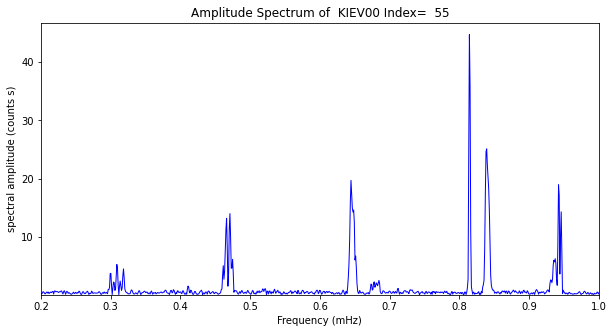

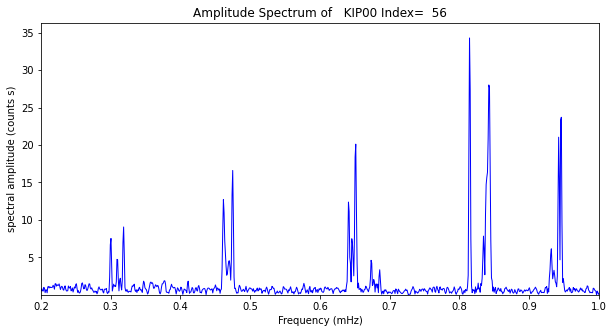

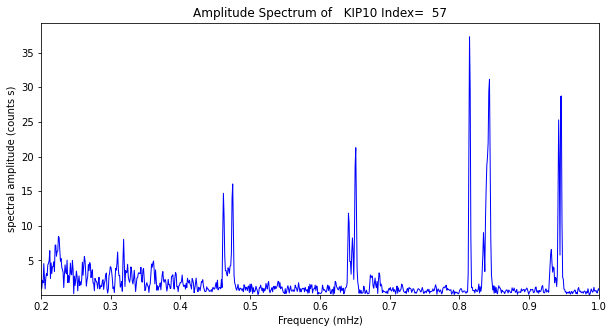

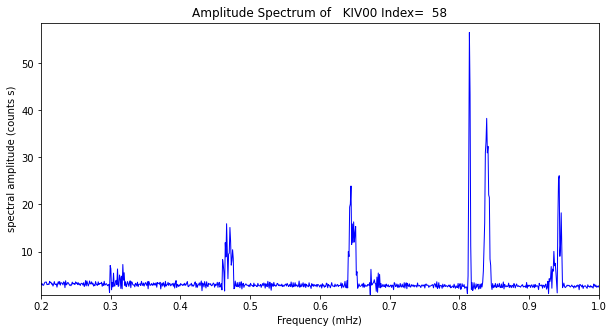

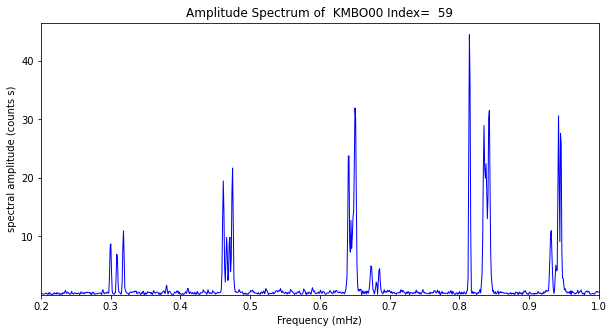

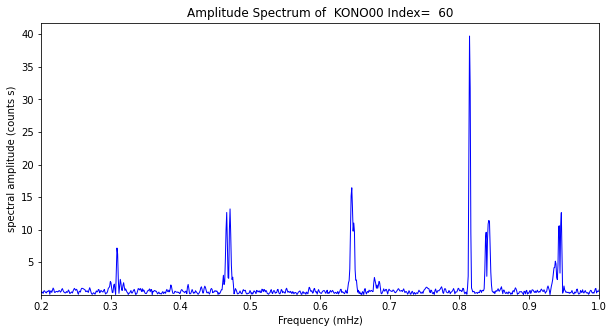

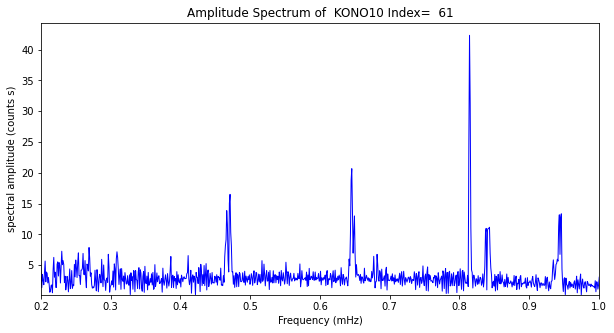

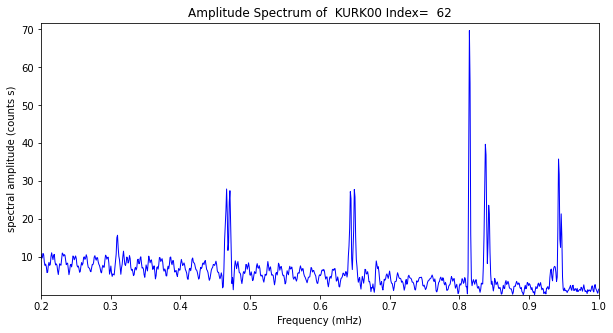

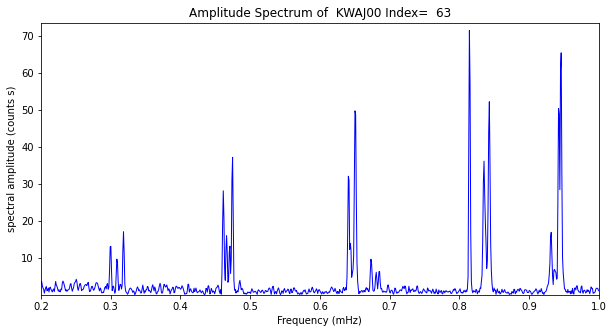

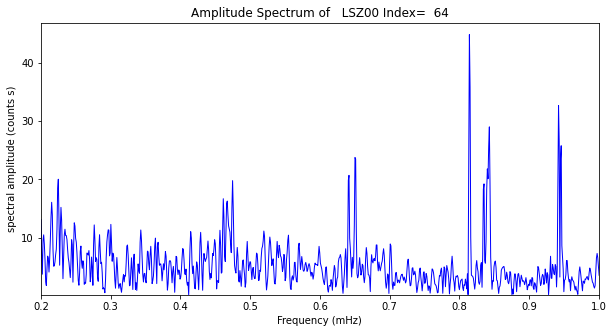

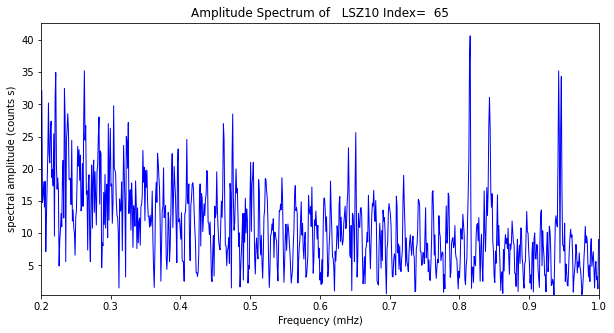

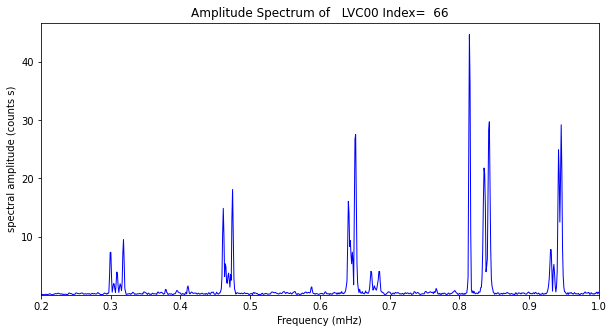

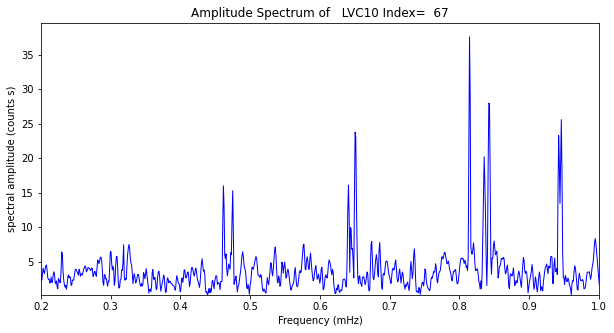

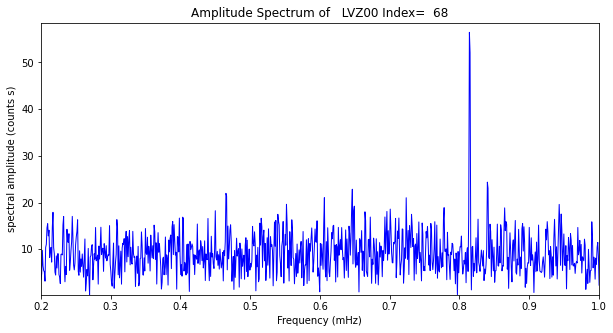

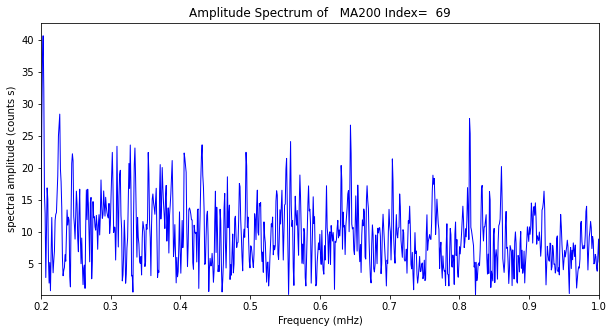

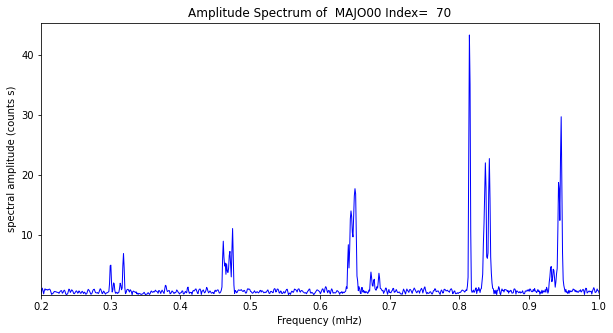

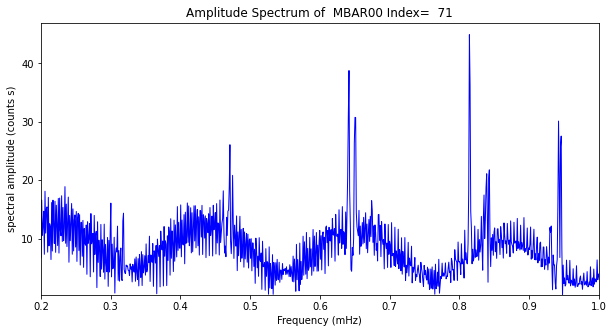

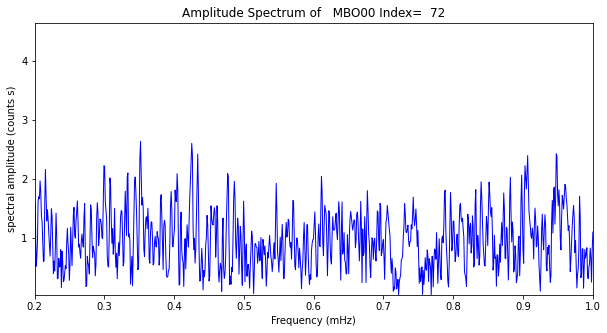

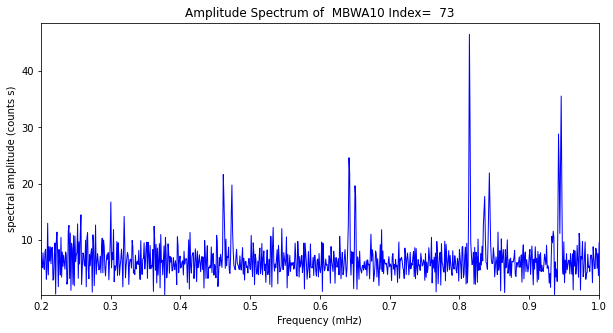

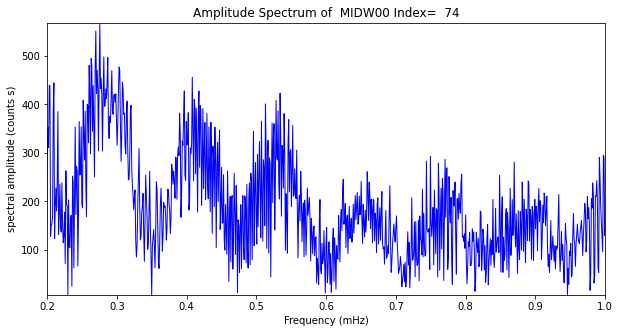

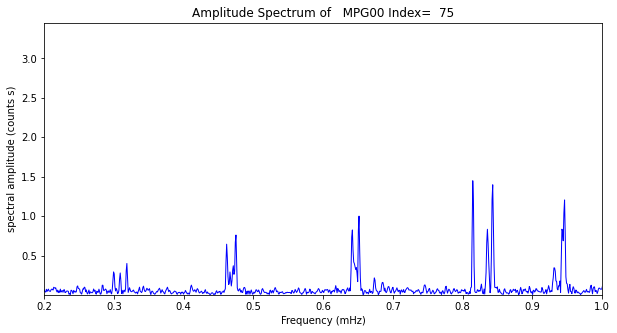

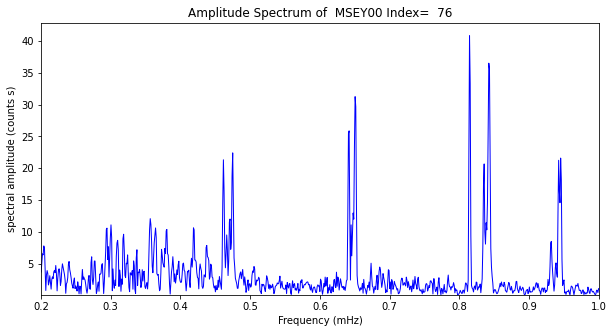

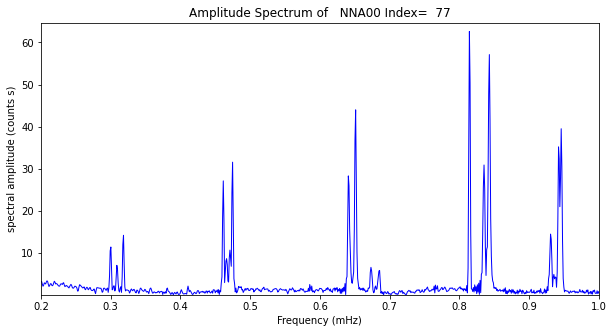

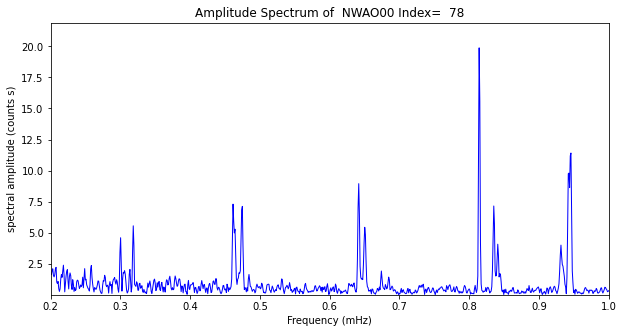

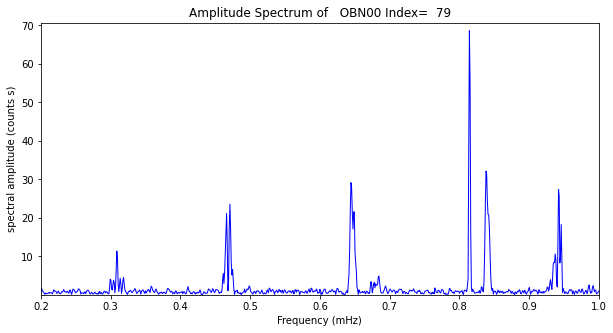

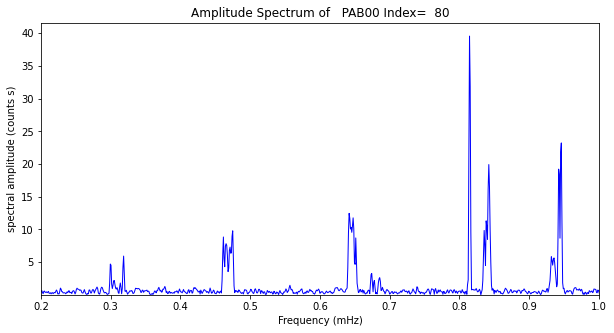

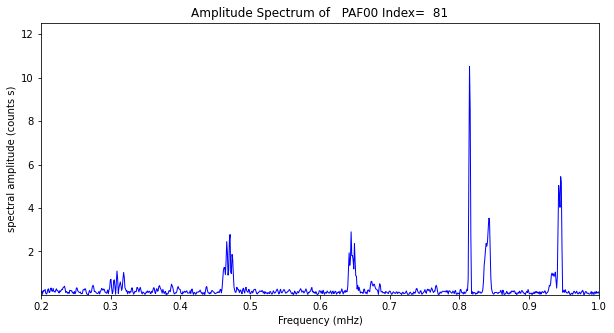

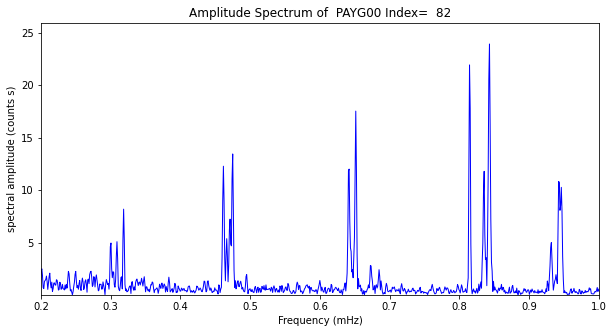

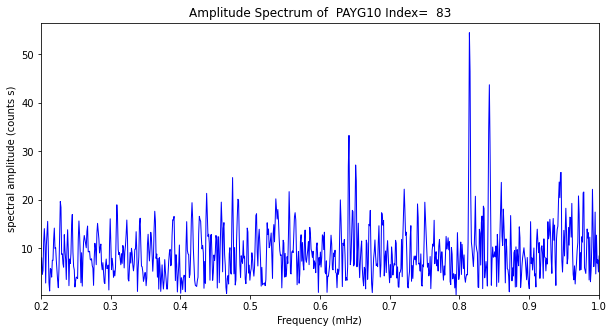

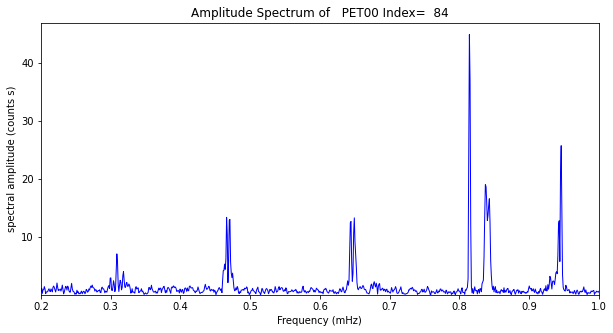

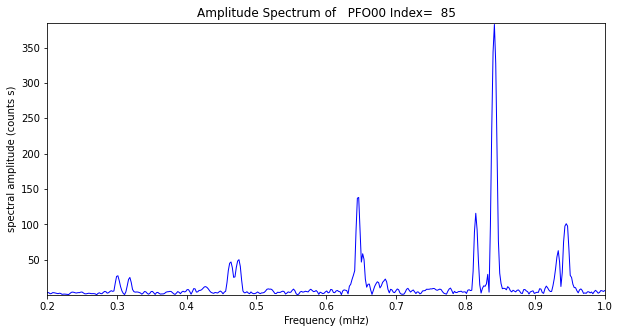

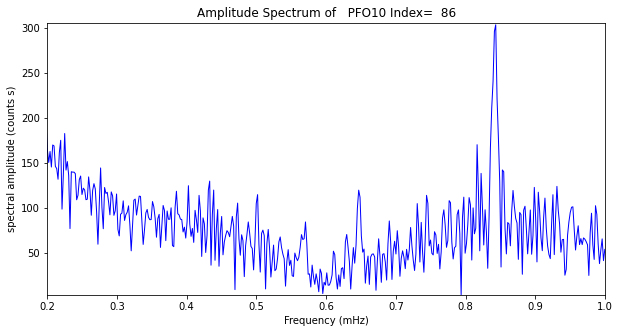

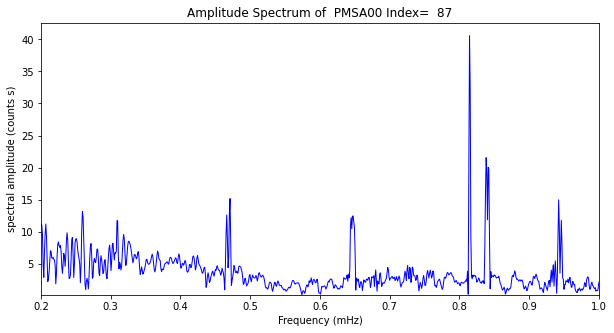

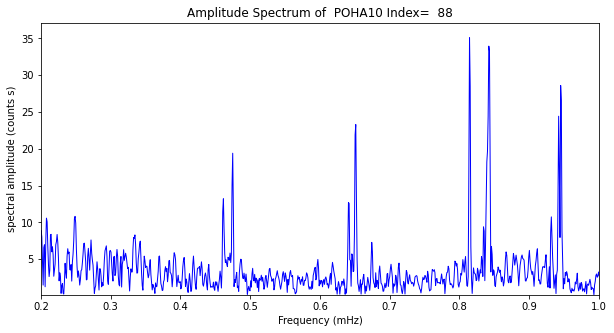

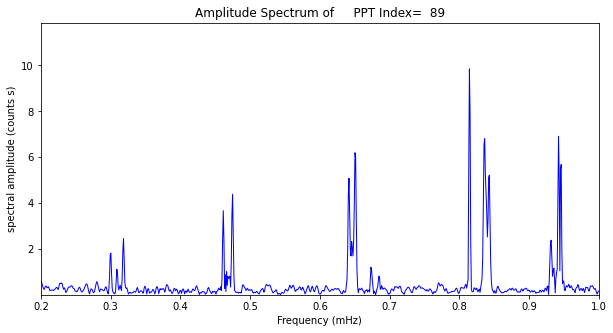

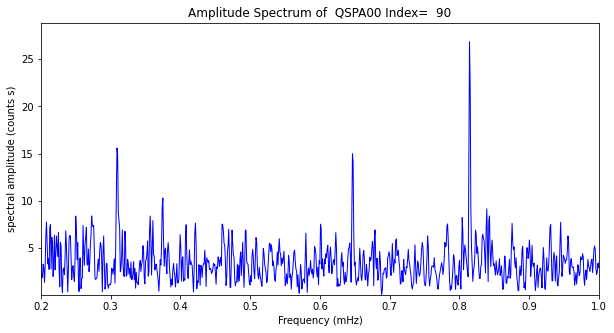

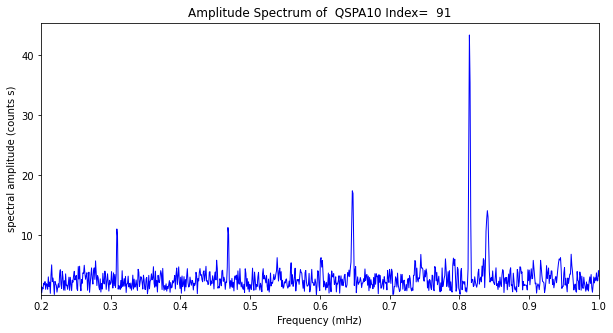

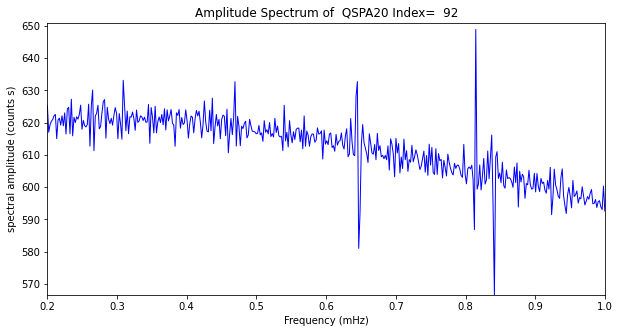

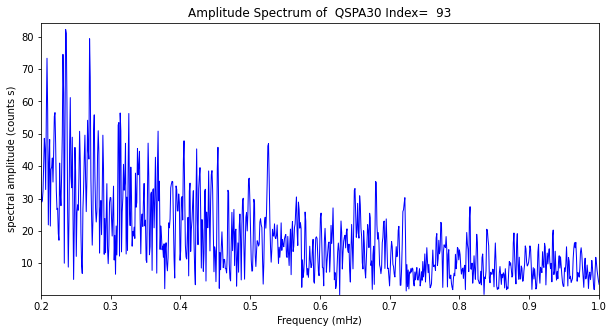

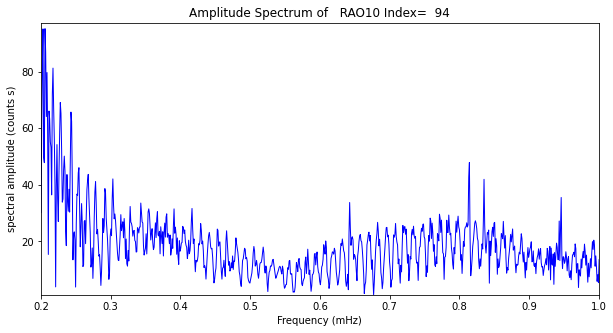

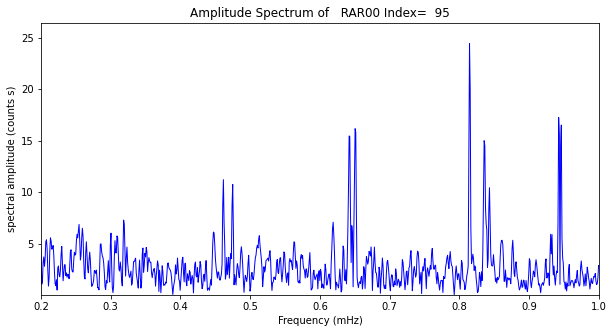

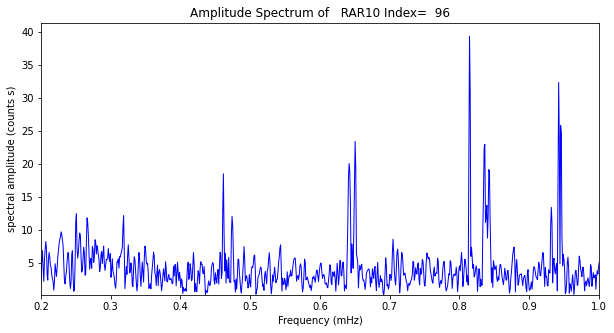

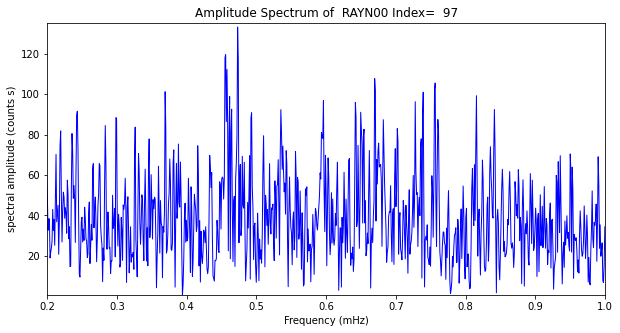

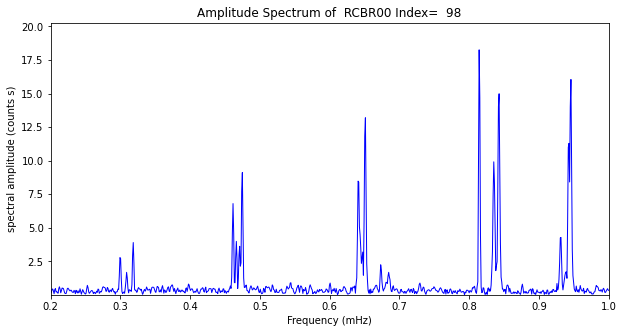

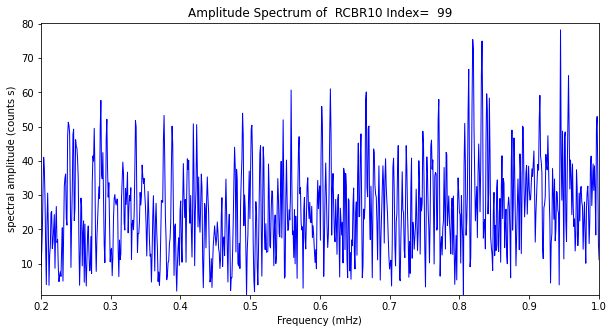

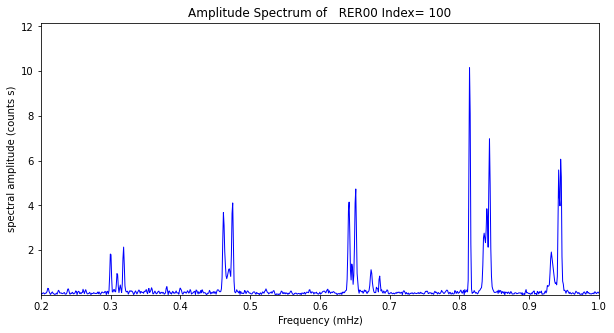

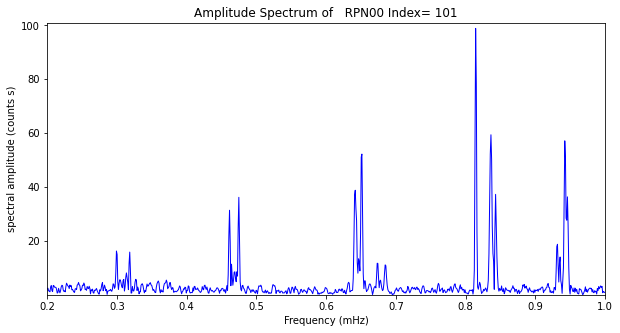

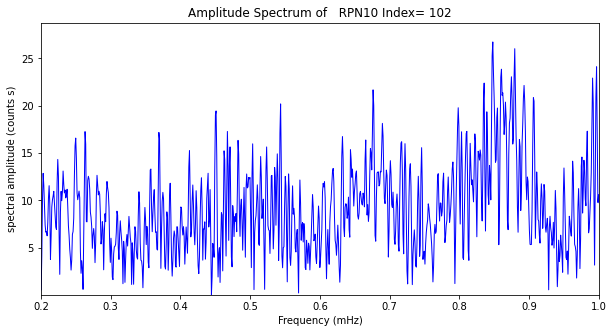

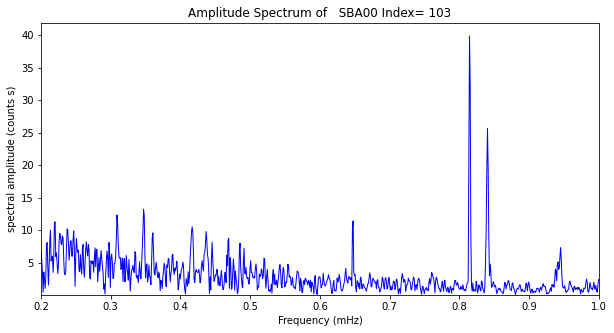

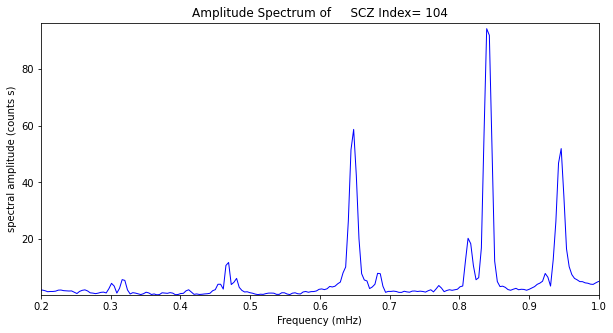

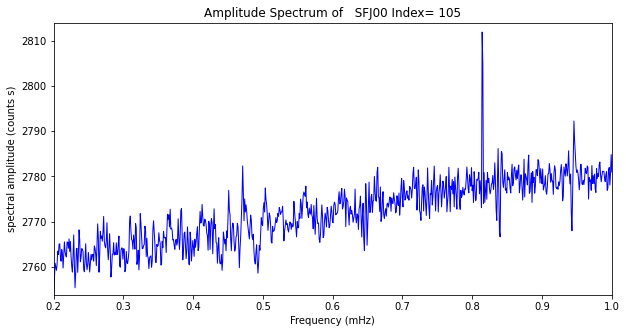

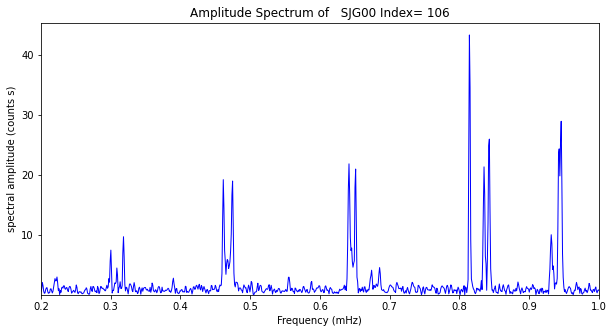

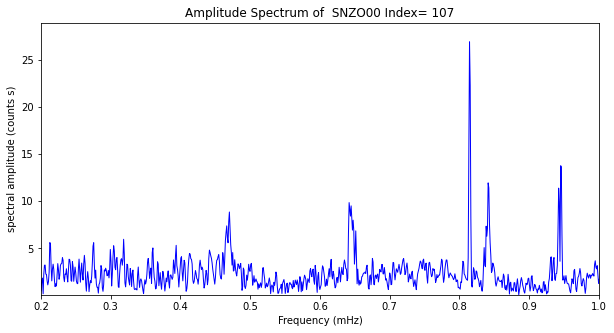

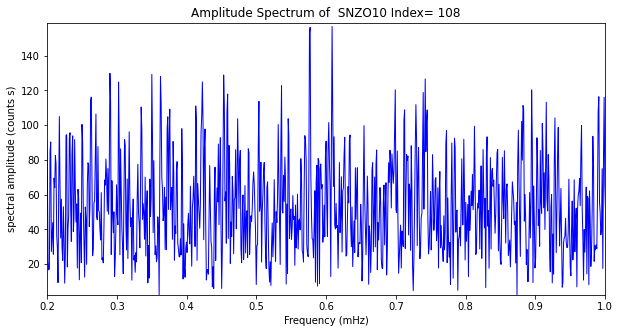

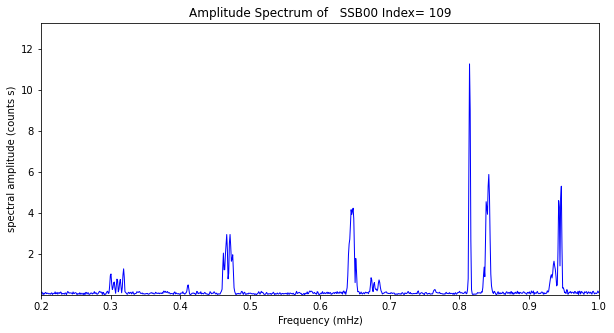

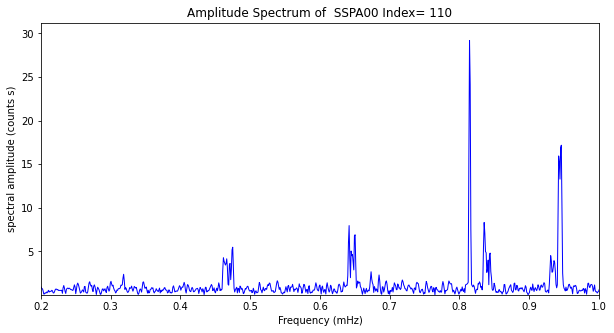

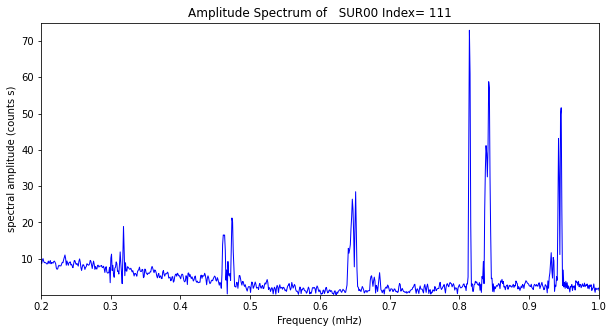

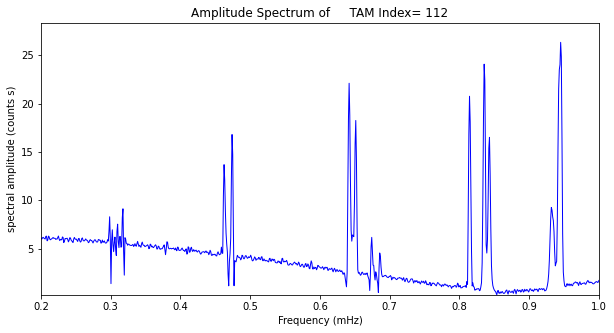

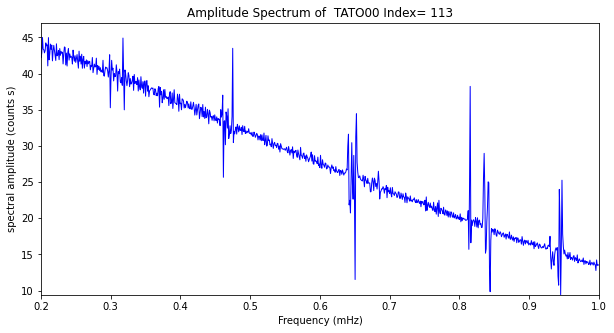

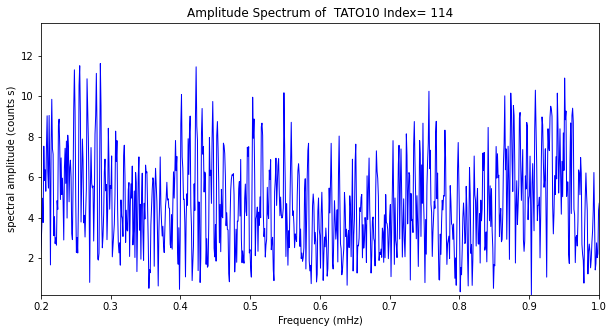

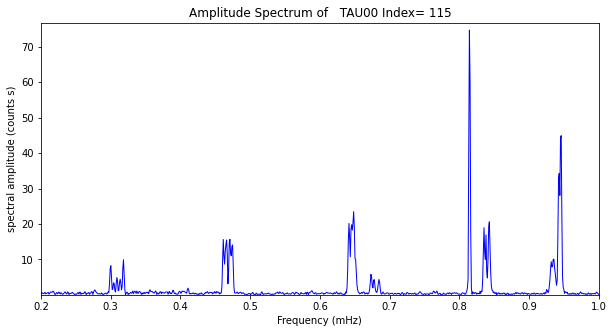

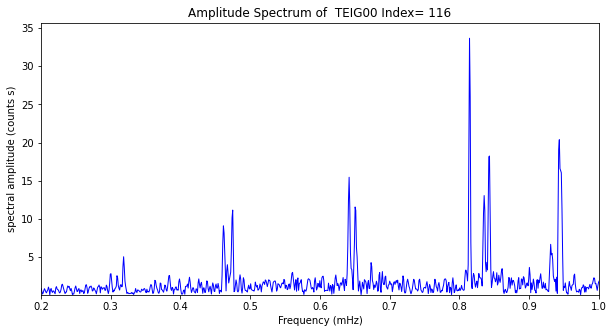

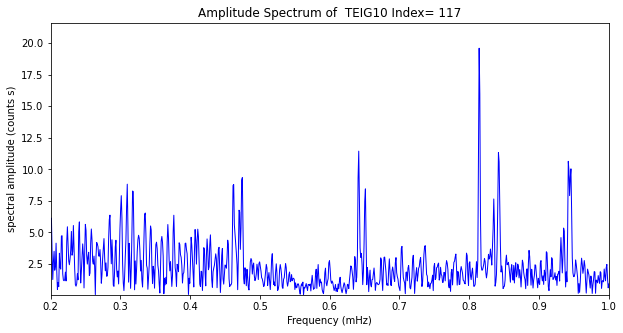

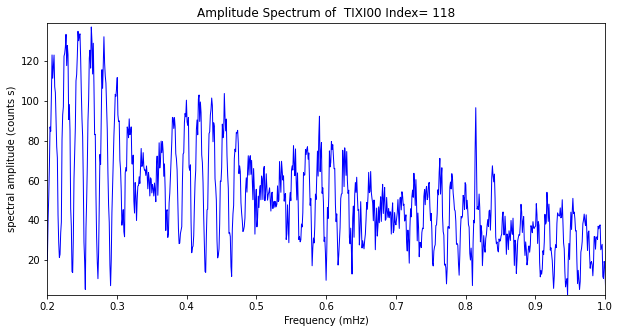

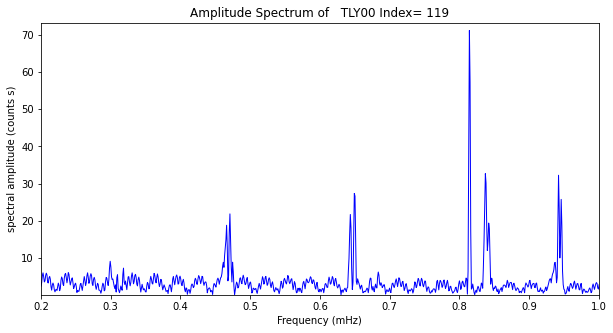

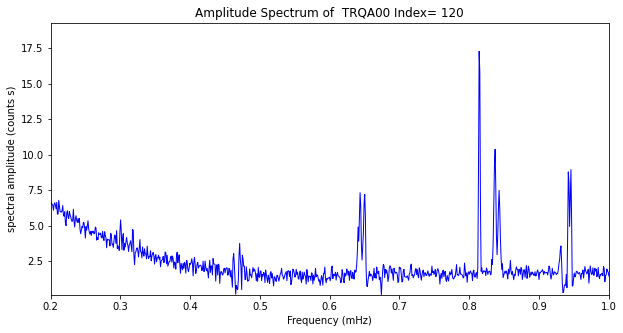

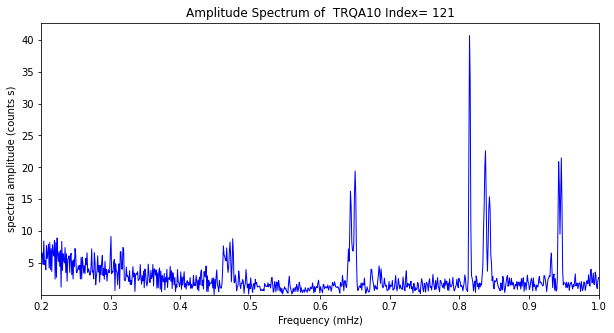

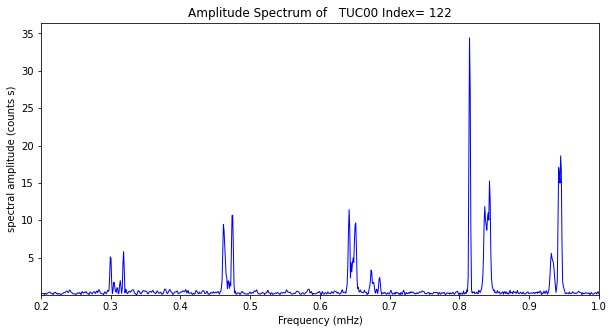

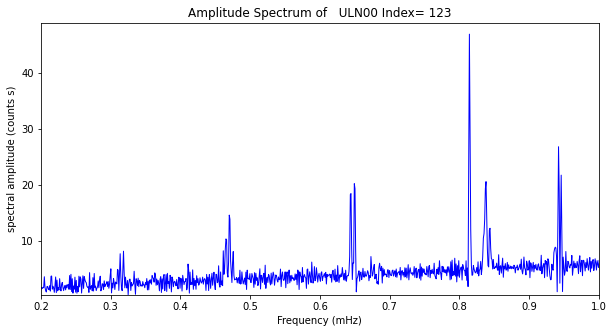

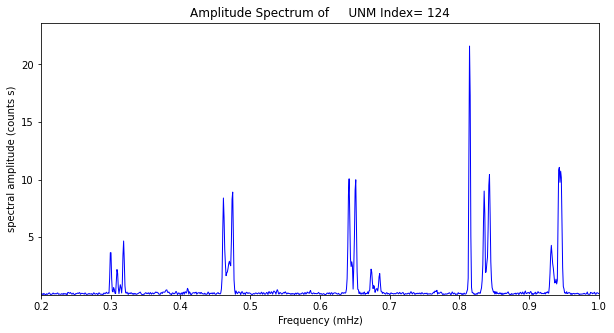

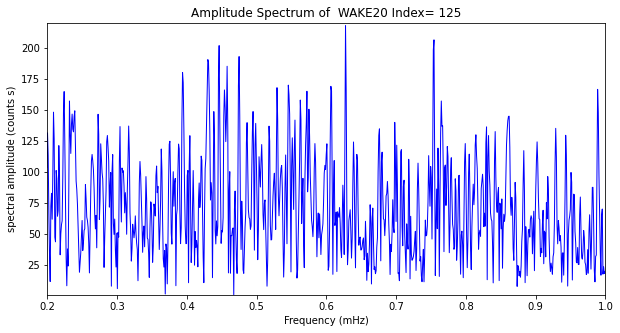

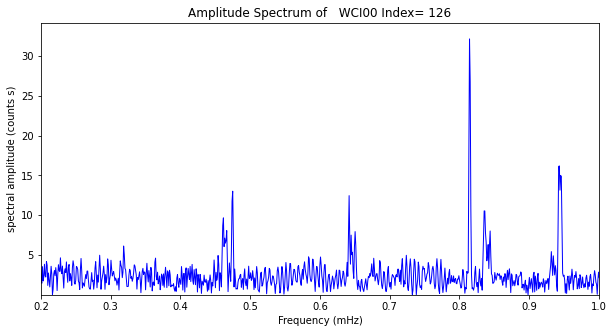

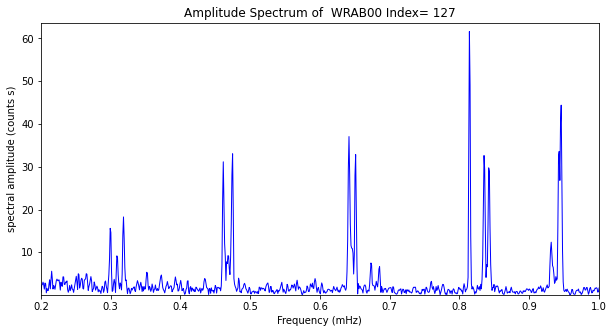

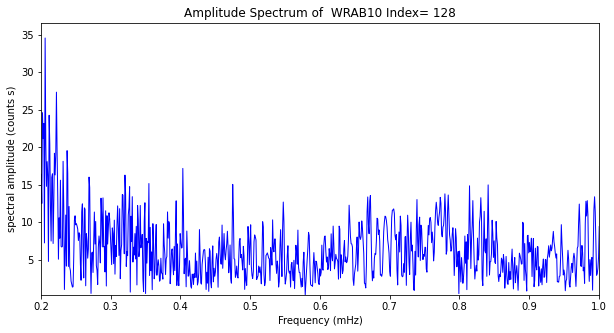

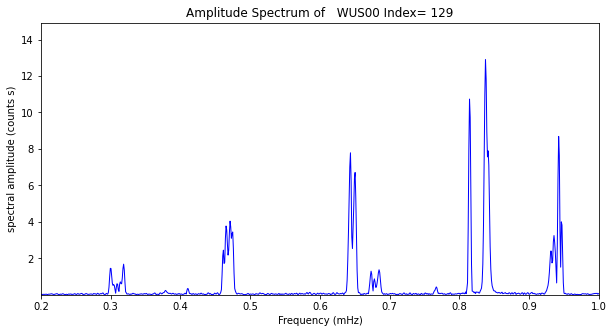

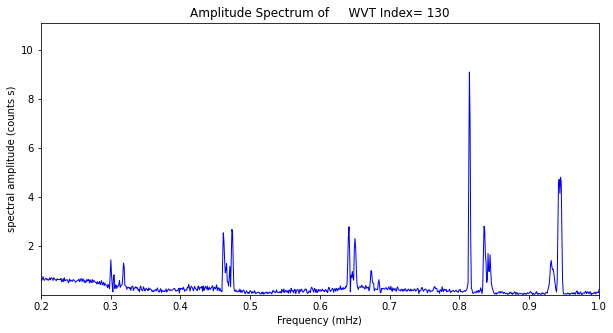

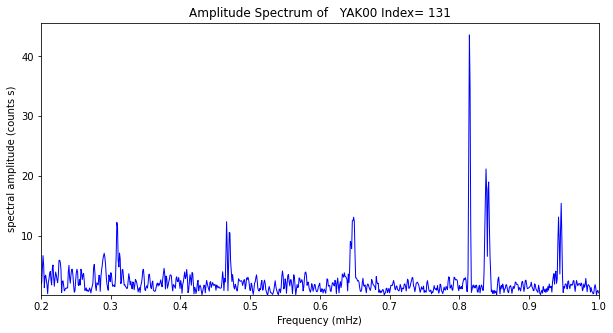

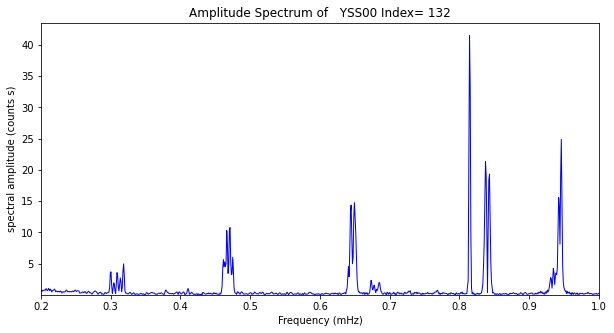

In [7]:
# PLOT ALL NON-CUT STATIONS WITH INDEXES
# note: INDEX VALUES are the same values as the 2nd column sumatra_modes.txt

for i in range(len(all_amps)):
    st_fft=all_amps[i].data
    C = st_fft*np.exp(1j*all_phs[i]) # Fourier Transform C(w)
    indarray=abs(C)
    winind=[]
    for k,j in enumerate(all_f[i]):
        if (j >= .0002) and (j <= .001):
            winind.append(indarray[k])
    maxwin=max(winind);minwin=min(winind)
    plt.plot(all_f[i]*1000, abs(indarray), color='b')
    plt.title('Amplitude Spectrum of %7s Index= %3s' % (ksta[i], str(i)))
    plt.xlabel('Frequency (mHz)')
    plt.ylabel('spectral amplitude (counts s)')
    plt.xlim(0.2, 1)
    plt.ylim(minwin, maxwin+2)
    #plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    plt.show()

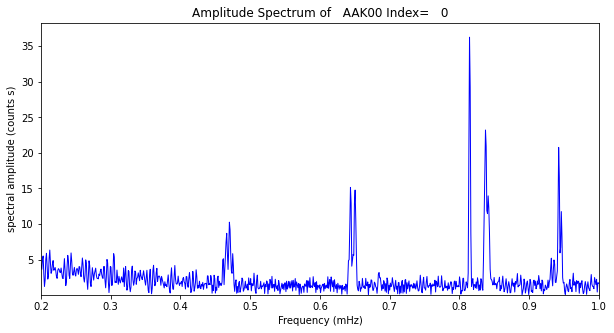

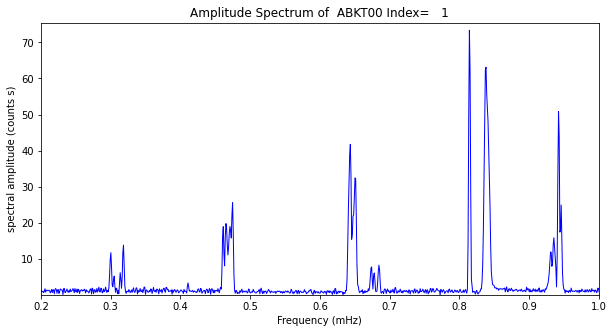

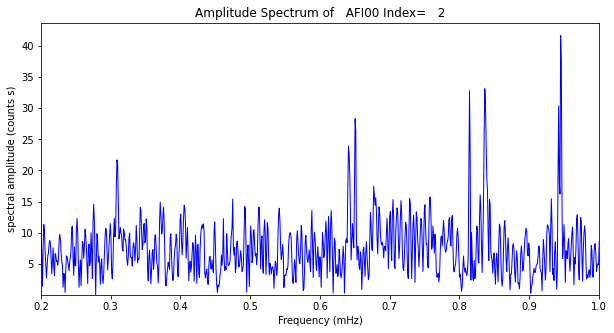

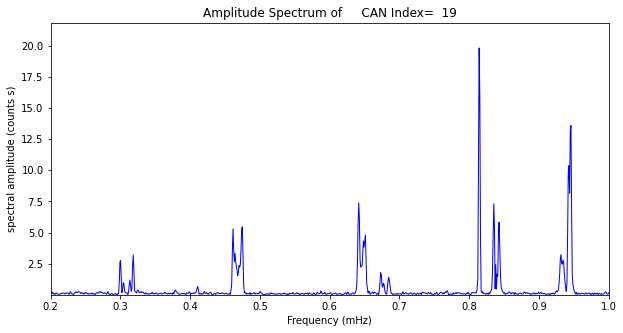

In [8]:
# USER: PICK A SET TO PLOT AND SAVE FOR ANALYSIS (pick by index)
# note: these are the same values as the 2nd column of ./datawf/sumatra_fft/sumatra_modes.txt
#       use those values to index

ipick=[0,1,2,19]      # CHANGE THESE
for i in ipick:
    st_fft=all_amps[i].data
    C = st_fft*np.exp(1j*all_phs[i]) # Fourier Transform C(w)
    indarray=abs(C)
    winind=[]
    for k,j in enumerate(all_f[i]):
        if (j >= .0002) and (j <= .001):
            winind.append(indarray[k])
    maxwin=max(winind)
    minwin=min(winind)
    plt.plot(all_f[i]*1000, abs(C), color='b')
    plt.title('Amplitude Spectrum of %7s Index= %3s' % (ksta[i], str(i)))
    plt.xlabel('Frequency (mHz)')
    plt.ylabel('spectral amplitude (counts s)')
    plt.xlim(0.2, 1)
    plt.ylim(minwin, maxwin+2)
    plt.show()

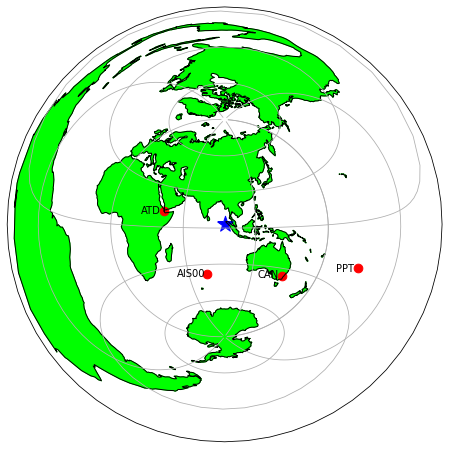

In [9]:
# global map of user-selected stations
slat=np.array(slat)
slon=np.array(slon)
stanames=np.array(stanames)
plot_event_station(elat,elon,slat=slat[[ipick]],slon=slon[[ipick]],stas=stanames[[ipick]])

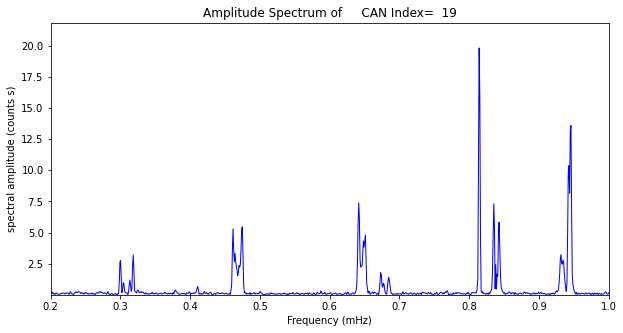

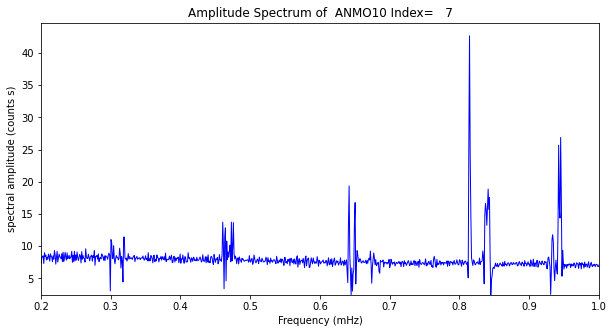

In [10]:
# Pick waveforms based on station names instead of indices
# (look at ./datawf/sumatra_fft/sumatra_modes.txt for station names)
# Note that many station names are the station label plus the location code i.e 'ANMO10'

station_nm=['CAN','ANMO10']     # CHANGE THESE
for n in station_nm:
    ind=ksta.index(n)   
    st_fft=all_amps[ind].data
    C = st_fft*np.exp(1j*all_phs[ind]) # Fourier Transform C(w)
    indarray=abs(C)
    winind=[]
    for k,j in enumerate(all_f[ind]):
        if (j >= .0002) and (j <= .001):
            winind.append(indarray[k])
    maxwin=max(winind)
    minwin=min(winind)
    plt.plot(all_f[ind]*1000, abs(C), color='b')
    plt.title('Amplitude Spectrum of %7s Index= %3s' % (ksta[ind], str(ind)))
    plt.xlabel('Frequency (mHz)')
    plt.ylabel('spectral amplitude (counts s)')
    plt.xlim(0.2, 1)
    plt.ylim(minwin, maxwin+2)
    plt.show()